# **Proyecto 5: eficiencia de tarifas Megaline**

## **Descripción del proyecto**

**¿Cuál es la mejor tarifa?**

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## **Descripción de las tarifas:**

**Tarifa: Surf**

* Pago mensual: $20.

* 500 minutos al mes, 50 SMS y 15 GB de datos.

Si se exceden los límites del paquete:

* 1 minuto: 3 centavos.
* 1 SMS: 3 centavos.
* 1 GB de datos: $10.

**Tarifa: Ultimate**

* Pago mensual: $70.

* 3000 minutos al mes, 1000 SMS y 30 GB de datos.

Si se exceden los límites del paquete:

* 1 minuto: 1 centavo.
* 1 SMS: 1 centavo.
* 1 GB de datos: $7.

Nota: Megaline redondea los segundos a minutos y los megabytes a gigabytes. Para las llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. Para el tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

## **Objetivo:** 

Identificar las tarifas con mejor rendimiento de ingresos para la compañía.

## **Etapas:**

* Revisión y análisis de las bases de datos: “tarifas”, “usuarios”, “llamadas”, “mensajes”, “internet”.
* Procesamiento de bases de datos: revisión de estilo snake_case, validación de tipo de datos por dataset, valores duplicados explícitos e intrínsecos, valores ausentes, acciones tomadas para valores ausentes.
* Uniones y/o agrupaciones en caso de ser requeridas para los análisis.
* Análisis general de las bases de datos: utilización de gráficos y estadísticas descriptivas.
* Análisis estadístico: definición de hipótesis, pruebas de probabilidad, recomendaciones estadísticas.
* Conclusiones finales del estudio de acuerdo a los hallazgos obtenidos.


## **Diccionario de datos**

En este proyecto, se cuenta con cinco tablas diferentes.

**Tabla users (datos sobre los usuarios):**

  * user_id: identificador único del usuario.

  * first_name: nombre del usuario.

  * last_name: apellido del usuario.

  * age: edad del usuario (en años).

  * reg_date: fecha de suscripción (dd, mm, aa).

  * churn_date: la fecha en la que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando fue extraída esta base de datos).

  * city: ciudad de residencia del usuario.

  * plan: nombre de la tarifa.

**Tabla calls (datos sobre las llamadas):**

  * id: identificador único de la llamada.

  * call_date: fecha de la llamada.

  * duration: duración de la llamada (en minutos).

  * user_id: el identificador del usuario que realiza la llamada.

**Tabla messages (datos sobre los SMS):**

  * id: identificador único del SMS.

  * message_date: fecha del SMS.

  * user_id: el identificador del usuario que manda el SMS.

**Tabla internet (datos sobre las sesiones web):**

  * id: identificador único de la sesión.

  * mb_used: el volumen de datos gastados durante la sesión (en megabytes).

  * session_date: fecha de la sesión web.

  * user_id: identificador del usuario.

**Tabla plans (datos sobre las tarifas):**

  * plan_name: nombre de la tarifa.

  * usd_monthly_fee: pago mensual en dólares estadounidenses.

  * minutes_included: minutos incluidos al mes.

  * messages_included: SMS incluidos al mes.

  * mb_per_month_included: datos incluidos al mes (en megabytes).

  * usd_per_minute: precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos, el operador cobrará el minuto 101).

  * usd_per_message: precio por SMS tras exceder los límites del paquete.

  * usd_per_gb: precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes).

## **Procesamiento de datos**

**Cargar librerías**

In [202]:
# Cargar todas las librerías

try: 

    import pandas as pd
    import numpy as np
    import seaborn as sns
    from math import factorial
    from scipy import stats as st
    from matplotlib import pyplot as plt
    print('Librerías cargadas correctamente')

except:
    print('Error al cargar las librerías')


Librerías cargadas correctamente


**Cargar datos**

In [203]:
# Carga los archivos de datos en diferentes DataFrames

try:

    llamadas = pd.read_csv('megaline_calls.csv')
    internet = pd.read_csv('megaline_internet.csv')
    mensajes = pd.read_csv('megaline_messages.csv')
    tarifas = pd.read_csv('megaline_plans.csv')
    usuarios = pd.read_csv('megaline_users.csv')
    print('Archivos cargados correctamente')


except:

    print('Error en carga de archivos')

Archivos cargados correctamente


### **Revisión de los datasets**

#### **Tarifas**

In [204]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

print('Información dataset "tarifas":')
print()
print(tarifas.info())

Información dataset "tarifas":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
None


In [205]:
# Imprime una muestra de los datos para las tarifas

print('Muestra dataset "tarifas": \n\n', tarifas.head())

Muestra dataset "tarifas": 

    messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


**Observaciones dataset “tarifas”:**

* 8 columnas, con estilo snake_case, no es necesario cambiar
* 2 filas, sin datos ausentes o duplicados
* El tipo de dato por cada columna es correcto, únicamente se realizará el cambio de la columna “plan_name” del tipo “object” a “category” para facilitar futuros análisis y hacer mas eficiente su procesamiento.
* La columna “mb_per_month_included” indica los los megabytes incluidos en cada plan, sin embargo, se sugiere agregar una columna al dataset con la conversión de este dato gigabytes ya que es la medida estándar que se utiliza para la medición de los planes.
* En cuanto a los minutos incluidos en cada plan se miden en minutos cerrados, en caso de que los registros de la medición de la duración de las llamadas contengan minutos y segundos, será necesario redondear al minuto superior inmediato, de acuerdo con las políticas de la compañía.

**Corregir datos**

In [206]:
# columna "plan_name" de tipo "object" a "category"

tarifas['plan_name'] = tarifas['plan_name'].astype('category')

print('Información dataset "tarifas":')
print()
print(tarifas.info())

Información dataset "tarifas":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   messages_included      2 non-null      int64   
 1   mb_per_month_included  2 non-null      int64   
 2   minutes_included       2 non-null      int64   
 3   usd_monthly_pay        2 non-null      int64   
 4   usd_per_gb             2 non-null      int64   
 5   usd_per_message        2 non-null      float64 
 6   usd_per_minute         2 non-null      float64 
 7   plan_name              2 non-null      category
dtypes: category(1), float64(2), int64(5)
memory usage: 370.0 bytes
None


**Enriquecer los datos**

In [207]:
# Imprime una muestra de los datos para las tarifas

tarifas['gb_per_month_included'] = [15,30]

print('Muestra dataset "tarifas": \n\n', tarifas.head())

Muestra dataset "tarifas": 

    messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                     15  
1                     30  


#### **Usuarios/as**

In [208]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

print('Información dataset "usuarios":')
print()
print(usuarios.info())

Información dataset "usuarios":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [209]:
# Imprime una muestra de datos para usuarios

print('Muestra dataset "usuarios": \n\n', usuarios.sample(10))

Muestra dataset "usuarios": 

      user_id first_name last_name  age  \
36      1036      Myron     Hodge   70   
499     1499      Shena   Dickson   37   
81      1081     Grayce     Sears   44   
279     1279       Neal      Duke   27   
175     1175     Shiloh  Stafford   25   
84      1084      Wiley  Mckinney   21   
256     1256     Johnny      Wise   53   
277     1277     Andrew  Faulkner   25   
383     1383  Margarito     Mccoy   52   
449     1449       Boyd    Kelley   39   

                                              city    reg_date      plan  \
36                  Denver-Aurora-Lakewood, CO MSA  2018-05-09  ultimate   
499              Orlando-Kissimmee-Sanford, FL MSA  2018-05-06      surf   
81             Dallas-Fort Worth-Arlington, TX MSA  2018-04-27      surf   
279                            Baton Rouge, LA MSA  2018-02-05  ultimate   
175      New York-Newark-Jersey City, NY-NJ-PA MSA  2018-09-30      surf   
84   Miami-Fort Lauderdale-West Palm Beach, FL MSA

In [210]:
# validaciones adicionales

print('Registros duplicados:', usuarios.duplicated().sum())    # duplicados
print()
print('Registros ausentes:', usuarios.isna().sum())    # valores ausentes
print()
print('Ids únicos:', usuarios['user_id'].unique())    # ids únicos

Registros duplicados: 0

Registros ausentes: user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Ids únicos: [1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139
 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153
 115

**Observaciones dataset “usuarios”:**

* 8 columnas, con estilo snake_case, no es necesario cambiar.
* 500 filas, del index 0 a 499.
* Los valores de las columnas “reg_date” y “churn_date” se cambiarán a tipo “datetime”.
* No se cuenta con valores duplicados.
* La columna “churn_date” es una única con 466 valores ausentes, estos se dejaran como "NaT" (valor ausente de tipo datetime), ya que esta indica la fecha en que el usuario dejó de usar el servicio, los valores ausentes indican que el servicio esta vigente en uso al momento de la extracción.
* Se agregarán dos columnas al dataset:
   * “reg_month”: indica el mes de registro del usuario al plan.
   * “reg_year”:  indica el año de registro del usuario al plan.

**Corregir los datos**

In [211]:
# Cambio de formato de 'reg_date' y 'churn_date' a datetime

usuarios['reg_date'] = pd.to_datetime(usuarios['reg_date'], format= '%Y-%m-%d')

usuarios['churn_date'] = pd.to_datetime(usuarios['churn_date'], format= '%Y-%m-%d')

print('Información dataset "usuarios":')
print()
print(usuarios.info())

Información dataset "usuarios":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


**Enriquecer los datos**

In [212]:
# Agregar columnas 'reg_year', 'reg_month','churn_year','churn_month'

usuarios['reg_year'] = usuarios['reg_date'].dt.year

usuarios['reg_month'] = usuarios['reg_date'].dt.month

usuarios['churn_year'] = usuarios['churn_date'].dt.year

usuarios['churn_month'] = usuarios['churn_date'].dt.month

print('Muestra dataset "usuarios": \n\n', usuarios.sample(5))
print()
print('Información dataset "usuarios":')
print()
print(usuarios.info())

Muestra dataset "usuarios": 

      user_id first_name last_name  age  \
250     1250      Milan   Sellers   57   
343     1343    Teresia     Ewing   43   
435     1435    Darnell    Powell   23   
341     1341      Kaila   Andrews   28   
40      1040      Paris    Santos   72   

                                                 city   reg_date      plan  \
250          Houston-The Woodlands-Sugar Land, TX MSA 2018-04-03  ultimate   
343     Miami-Fort Lauderdale-West Palm Beach, FL MSA 2018-08-23      surf   
435  Washington-Arlington-Alexandria, DC-VA-MD-WV MSA 2018-07-24  ultimate   
341            Chicago-Naperville-Elgin, IL-IN-WI MSA 2018-06-17      surf   
40    Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA 2018-12-23      surf   

    churn_date  reg_year  reg_month  churn_year  churn_month  
250        NaT      2018          4         NaN          NaN  
343        NaT      2018          8         NaN          NaN  
435        NaT      2018          7         NaN          N

#### **Llamadas**

In [213]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

print('Información dataset "llamadas":')
print()
print(llamadas.info())

Información dataset "llamadas":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [214]:
# Imprime una muestra de datos para las llamadas

print('Muestra dataset "llamadas": \n\n', llamadas.sample(10))

Muestra dataset "llamadas": 

               id  user_id   call_date  duration
132700  1478_154     1478  2018-12-29     13.77
86074   1317_104     1317  2018-12-23      5.48
71789   1255_629     1255  2018-11-16     11.78
26974   1101_301     1101  2018-05-22     10.56
119435   1416_58     1416  2018-12-03     14.30
70881   1252_268     1252  2018-09-15      5.96
61786   1222_433     1222  2018-09-19     19.57
88601   1324_657     1324  2018-09-12     14.91
90098    1327_23     1327  2018-12-02      9.66
8258    1039_198     1039  2018-11-05     13.91


In [215]:
# validaciones adicionales

print('Registros duplicados:', llamadas.duplicated().sum())    # duplicados
print()
print('Registros ausentes:', llamadas.isna().sum())    # valores ausentes
print()
print('Ids únicos:', llamadas['id'].value_counts().head(10))    # ids únicos de registro de llamadas

Registros duplicados: 0

Registros ausentes: id           0
user_id      0
call_date    0
duration     0
dtype: int64

Ids únicos: id
1499_203    1
1000_93     1
1000_145    1
1000_247    1
1000_309    1
1000_380    1
1000_388    1
1499_187    1
1499_186    1
1499_185    1
Name: count, dtype: int64


**Observaciones dataset “llamadas”:**

* 4	columnas, con estilo snake_case, no es necesario cambiar.
* 137,735 filas del índice 0 al 137,734.
* No existen valores duplicados.
* No existen valores ausentes.
* La columna “call_date” que contiene las fechas de las llamadas se encuentra en formato “object”, se realizara el cambio a formato “datetime”.
* El resto de las columnas se encuentran en formato correcto para el análisis.
* Se agregaran las columnas:
  * “call_year”: indica el año en que se registró la llamada.
  * “call_month”: indica el mes en que se registró la llamada.
  * "call_duration": la compañía mide cada llamada individual en minutos cerrados, esta columna contendra los minutos de las llamadas indicados en "duration" de forma redondeada.
* Se cambiará el nombre de la columna “id” por el de “call_id”, para evitar futuras confusiones con otros “id´s” de las bases de datos.

**Corregir los datos**

In [216]:
# Cambio de formato de 'call_date' a datetime.

llamadas['call_date'] = pd.to_datetime(llamadas['call_date'], format= '%Y-%m-%d')

print('Información dataset "llamadas":')
print()
print(llamadas.info())

Información dataset "llamadas":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


**Enriquecer los datos**

In [217]:
# Agregar columnas 'call_year', 'call_month', 'call_duration'.

llamadas['call_year'] = llamadas['call_date'].dt.year

llamadas['call_month'] = llamadas['call_date'].dt.month

llamadas['call_duration'] = np.ceil(llamadas['duration'])    # redondeo de tiempo de llamadas

llamadas['call_duration'] = llamadas['call_duration'].astype('int')  # cambio de tipo de duración de llamadas a 'int'.

print('Muestra dataset "llamadas": \n\n', llamadas.sample(5))
print()
print('Información dataset "llamadas":')
print()
print(llamadas.info())

Muestra dataset "llamadas": 

              id  user_id  call_date  duration  call_year  call_month  \
43637  1159_233     1159 2018-10-07      0.00       2018          10   
34578   1130_98     1130 2018-11-12     19.51       2018          11   
30763  1114_800     1114 2018-10-21     12.66       2018          10   
4791    1022_57     1022 2018-12-25      0.03       2018          12   
61600  1222_247     1222 2018-10-16      1.32       2018          10   

       call_duration  
43637              0  
34578             20  
30763             13  
4791               1  
61600              2  

Información dataset "llamadas":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             137735 non-null  object        
 1   user_id        137735 non-null  int64         
 2   call_date      137735 non-null  datetime6

In [291]:
# Cambiar nombre de columna 'id' por 'call_id'

llamadas = llamadas.rename(columns={'id':'call_id'})

print('Muestra dataset "llamadas": \n\n', llamadas.sample(5))

Muestra dataset "llamadas": 

           call_id  user_id  call_date  duration  call_year  call_month  \
25846    1099_166     1099 2018-12-25      0.00       2018          12   
112579   1397_154     1397 2018-09-09      0.00       2018           9   
20590    1077_557     1077 2018-07-20      8.44       2018           7   
108213  1382_1400     1382 2018-08-12      6.30       2018           8   
5271     1022_537     1022 2018-06-07      2.55       2018           6   

        call_duration  
25846               0  
112579              0  
20590               9  
108213              7  
5271                3  


#### **Mensajes**

In [219]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

print('Información dataset "mensajes":')
print()
print(mensajes.info())

Información dataset "mensajes":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [220]:
# Imprime una muestra de datos para los mensajes

print('Muestra dataset "mensajes": \n\n', mensajes.sample(10))

Muestra dataset "mensajes": 

              id  user_id message_date
43771   1291_74     1291   2018-07-28
62943    1399_8     1399   2018-09-07
66303  1433_243     1433   2018-09-28
74026  1475_160     1475   2018-09-28
22251  1133_203     1133   2018-11-27
42826  1280_375     1280   2018-09-11
143    1001_275     1001   2018-09-15
68248  1440_114     1440   2018-10-16
43792   1293_14     1293   2018-12-11
43139   1283_78     1283   2018-12-29


In [221]:
# validaciones adicionales

print('Registros duplicados:', mensajes.duplicated().sum())    # duplicados
print()
print('Registros ausentes:', mensajes.isna().sum())    # valores ausentes
print()
print('Ids únicos:', mensajes['id'].value_counts().head(10))    # ids únicos de registro de llamadas

Registros duplicados: 0

Registros ausentes: id              0
user_id         0
message_date    0
dtype: int64

Ids únicos: id
1497_613    1
1000_125    1
1000_160    1
1497_420    1
1497_418    1
1497_407    1
1497_402    1
1497_395    1
1497_392    1
1497_391    1
Name: count, dtype: int64


**Observaciones dataset “mensajes”:**

* 3	columnas, con estilo snake_case, no es necesario cambiar.
* 76,051 filas del índice 0 al 76,050.
* No existen valores duplicados.
* No existen valores ausentes.
* La columna “message_date” que contiene las fechas de los mensajes se encuentra en formato “object”, se realizara el cambio a formato “datetime”.
* El resto de las columnas se encuentran en formato correcto para el análisis.
* Se agregarán las columnas:
  * “message_year”: año en que se envió el mensaje.
  * “message_month”: mes en que se envió el mensaje.
* Se cambiará el nombre de la columna “id” por el de “message_id”, para evitar futuras confusiones con otros “id´s” de las bases de datos.

**Corregir los datos**

In [222]:
# Cambio de formato de 'message_date' a datetime.

mensajes['message_date'] = pd.to_datetime(mensajes['message_date'], format= '%Y-%m-%d')

print('Información dataset "mensajes":')
print()
print(llamadas.info())

Información dataset "mensajes":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   call_id        137735 non-null  object        
 1   user_id        137735 non-null  int64         
 2   call_date      137735 non-null  datetime64[ns]
 3   duration       137735 non-null  float64       
 4   call_year      137735 non-null  int32         
 5   call_month     137735 non-null  int32         
 6   call_duration  137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(1)
memory usage: 6.3+ MB
None


**Enriquecer los datos**

In [223]:
# Agregar columnas 'message_year', 'message_month'.

mensajes['message_year'] = mensajes['message_date'].dt.year

mensajes['message_month'] = mensajes['message_date'].dt.month

print('Muestra dataset "mensajes": \n\n', mensajes.sample(5))
print()
print('Información dataset "mensajes":')
print()
print(mensajes.info())

Muestra dataset "mensajes": 

              id  user_id message_date  message_year  message_month
2038    1027_21     1027   2018-08-21          2018              8
1346   1011_309     1011   2018-12-12          2018             12
55730   1351_34     1351   2018-12-26          2018             12
46033  1313_229     1313   2018-07-31          2018              7
42229  1273_263     1273   2018-11-01          2018             11

Información dataset "mensajes":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             76051 non-null  object        
 1   user_id        76051 non-null  int64         
 2   message_date   76051 non-null  datetime64[ns]
 3   message_year   76051 non-null  int32         
 4   message_month  76051 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(1)
memory usag

In [224]:
# Cambiar nombre de columna 'id' por 'id_call'

mensajes = mensajes.rename(columns={'id':'message_id'})

print('Muestra dataset "mensajes": \n\n', mensajes.sample(5))

Muestra dataset "mensajes": 

       message_id  user_id message_date  message_year  message_month
15397   1101_454     1101   2018-05-31          2018              5
32689   1203_334     1203   2018-08-20          2018              8
16138    1110_29     1110   2018-09-13          2018              9
66943   1434_509     1434   2018-06-20          2018              6
33229    1209_53     1209   2018-12-20          2018             12


#### **Internet**

In [225]:
# Imprime la información general/resumida sobre el DataFrame de internet

print('Información dataset "internet":')
print()
print(internet.info())

Información dataset "internet":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [226]:
# Imprime una muestra de datos para el tráfico de internet

print('Muestra dataset "internet": \n\n', internet.sample(10))

Muestra dataset "internet": 

              id  user_id session_date  mb_used
74898   1353_61     1353   2018-10-07   331.60
97815  1460_514     1460   2018-12-18   308.29
72948   1341_21     1341   2018-10-12   218.81
52378  1236_229     1236   2018-04-05   662.01
30569  1140_112     1140   2018-08-24   591.38
92892  1434_121     1434   2018-09-11   468.57
47949  1214_323     1214   2018-06-12   673.58
53522    1241_7     1241   2018-10-28   245.58
35290  1159_127     1159   2018-09-09   884.41
96768   1455_11     1455   2018-11-09   691.65


In [227]:
# validaciones adicionales

print('Registros duplicados:', internet.duplicated().sum())    # duplicados
print()
print('Registros ausentes:', internet.isna().sum())    # valores ausentes
print()
print('Ids únicos:', internet['id'].value_counts().head(10))    # ids únicos de registro de llamadas

Registros duplicados: 0

Registros ausentes: id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

Ids únicos: id
1499_219    1
1000_13     1
1000_204    1
1000_379    1
1000_413    1
1000_442    1
1001_0      1
1001_3      1
1001_4      1
1499_203    1
Name: count, dtype: int64


**Observaciones dataset “internet”:**

* 4	columnas, con estilo snake_case, no es necesario cambiar.
* 104,825 filas del índice 0 al 104,824.
* No existen valores duplicados.
* No existen valores ausentes.
* La columna “session_date” que contiene las fechas de los mensajes se encuentra en formato “object”, se realizara el cambio a formato “datetime”.
* El resto de las columnas se encuentran en formato correcto para el análisis.
* Se agregarán las columnas:
  * “session_year”: indica el año del inicio de la sesión en internet.
  * “session_month”: indica el mes del inicio de la sesión en internet.
* Se cambiará el nombre de la columna “id” por el de “sesión_id”, para evitar futuras confusiones con otros “id´s” de las bases de datos.
* Cada plan indica los gb incluidos de manera mensual, por lo que será necesario convertir los “mb_used” a gb, redondeando al gb inmediato superior los “mb_used” del mes, antes de realizar cualquier cálculo por usuario y mes.

**Corregir los datos**

In [228]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format= '%Y-%m-%d')

print('Información dataset "internet":')
print()
print(internet.info())

Información dataset "internet":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


**Enriquecer los datos**

In [229]:
internet['session_year'] = internet['session_date'].dt.year

internet['session_month'] = internet['session_date'].dt.month

print('Muestra dataset "internet": \n\n', internet.sample(5))
print()
print('Información dataset "internet":')
print()
print(internet.info())

Muestra dataset "internet": 

              id  user_id session_date  mb_used  session_year  session_month
63368   1292_72     1292   2018-10-07   187.27          2018             10
79217  1368_416     1368   2018-12-09    93.26          2018             12
54774  1247_189     1247   2018-12-17   207.71          2018             12
67800    1316_8     1316   2018-07-18   498.37          2018              7
33841    1154_1     1154   2018-10-03   188.61          2018             10

Información dataset "internet":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             104825 non-null  object        
 1   user_id        104825 non-null  int64         
 2   session_date   104825 non-null  datetime64[ns]
 3   mb_used        104825 non-null  float64       
 4   session_year   104825 non-null  int32         
 5   

In [230]:
# Cambiar nombre de columna 'id' por 'session_id'

internet = internet.rename(columns={'id':'session_id'})

print('Muestra dataset "internet": \n\n', internet.sample(5))

Muestra dataset "internet": 

       session_id  user_id session_date  mb_used  session_year  session_month
58568   1263_372     1263   2018-06-17   906.50          2018              6
62819   1289_210     1289   2018-12-27   614.39          2018             12
1960    1010_120     1010   2018-08-26   736.87          2018              8
7999     1043_37     1043   2018-08-25   605.03          2018              8
40625   1182_339     1182   2018-09-24    64.70          2018              9


## **Análisis exploratorio de datos**

### **Estudiar las condiciones de las tarifas**

In [231]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print('Descripción de las tarifas para los usuarios: \n\n', tarifas.head())

Descripción de las tarifas para los usuarios: 

    messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                     15  
1                     30  


#### **Datos por usuario**

In [232]:
# Validación de "user_id" únicos por cada dataset

print('"user_id" únicos en dataset "usuarios":', usuarios['user_id'].nunique())
print('"user_id" únicos en dataset "llamadas":', llamadas['user_id'].nunique())
print('"user_id" únicos en dataset "mensajes":', mensajes['user_id'].nunique())
print('"user_id" únicos en dataset "internet":', internet['user_id'].nunique())

"user_id" únicos en dataset "usuarios": 500
"user_id" únicos en dataset "llamadas": 481
"user_id" únicos en dataset "mensajes": 402
"user_id" únicos en dataset "internet": 489


In [233]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

llamadas_usuario = llamadas.groupby(['user_id','call_month'])['call_id'].count().reset_index()

llamadas_usuario = pd.DataFrame(llamadas_usuario)   # Guardar datos como dataset

llamadas_usuario = llamadas_usuario.rename(columns={'call_id':'total_calls_month', 'call_month':'month'})   ## Nombre de columna para llamadas totales por mes

print('Número de llamadas por usuario:\n\n', llamadas_usuario)

print(llamadas_usuario.info())

Número de llamadas por usuario:

       user_id  month  total_calls_month
0        1000     12                 16
1        1001      8                 27
2        1001      9                 49
3        1001     10                 65
4        1001     11                 64
...       ...    ...                ...
2253     1498     12                 39
2254     1499      9                 41
2255     1499     10                 53
2256     1499     11                 45
2257     1499     12                 65

[2258 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   user_id            2258 non-null   int64
 1   month              2258 non-null   int32
 2   total_calls_month  2258 non-null   int64
dtypes: int32(1), int64(2)
memory usage: 44.2 KB
None


In [292]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

minutos_usuario = llamadas.groupby(['user_id','call_month'])['call_duration'].sum().reset_index()

minutos_usuario = pd.DataFrame(minutos_usuario)   # Guardar datos como dataset

minutos_usuario = minutos_usuario.rename(columns={'call_duration':'total_min_month', 'call_month':'month'})   # Nombre de columna para minutos totales por mes

print('Total de minutos utilizados por el usuario:\n\n', minutos_usuario)

print(minutos_usuario.info())

Total de minutos utilizados por el usuario:

       user_id  month  total_min_month
0        1000     12              124
1        1001      8              182
2        1001      9              315
3        1001     10              393
4        1001     11              426
...       ...    ...              ...
2253     1498     12              339
2254     1499      9              346
2255     1499     10              385
2256     1499     11              308
2257     1499     12              496

[2258 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   user_id          2258 non-null   int64
 1   month            2258 non-null   int32
 2   total_min_month  2258 non-null   int64
dtypes: int32(1), int64(2)
memory usage: 44.2 KB
None


In [235]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

mensajes_usuario = mensajes.groupby(['user_id','message_month'])['message_id'].count().reset_index()

mensajes_usuario = pd.DataFrame(mensajes_usuario)  # Guardar datos como dataset

mensajes_usuario = mensajes_usuario.rename(columns={'message_id':'total_messages_month', 'message_month':'month'})   # Asignar nombre a columna de mensajes totales del mes

print('Total de mensajes enviados por el usuario:\n\n', mensajes_usuario)

print(mensajes_usuario.info())

Total de mensajes enviados por el usuario:

       user_id  month  total_messages_month
0        1000     12                    11
1        1001      8                    30
2        1001      9                    44
3        1001     10                    53
4        1001     11                    36
...       ...    ...                   ...
1801     1496      9                    21
1802     1496     10                    18
1803     1496     11                    13
1804     1496     12                    11
1805     1497     12                    50

[1806 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   user_id               1806 non-null   int64
 1   month                 1806 non-null   int32
 2   total_messages_month  1806 non-null   int64
dtypes: int32(1), int64(2)
memory usage: 35.4 KB
None


In [236]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet_usuario = internet.groupby(['user_id', 'session_month'])['mb_used'].sum().reset_index()

internet_usuario = pd.DataFrame(internet_usuario)  # Guardar los datos como dataset

internet_usuario = internet_usuario.rename(columns={'mb_used':'total_mb_month', 'session_month':'month'})    # Cambiar nombre de columna para 'total_mb_month'

internet_usuario['total_gb_month'] = np.ceil(internet_usuario['total_mb_month']/1000).astype('int')  # Agregar columna con la conversión de mb a gb.

print('Tráfico de internet (mb usados) por cada usuario:\n\n', internet_usuario.head())
print(internet_usuario.info())

Tráfico de internet (mb usados) por cada usuario:

    user_id  month  total_mb_month  total_gb_month
0     1000     12         1901.47               2
1     1001      8         6919.15               7
2     1001      9        13314.82              14
3     1001     10        22330.49              23
4     1001     11        18504.30              19
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2277 non-null   int64  
 1   month           2277 non-null   int32  
 2   total_mb_month  2277 non-null   float64
 3   total_gb_month  2277 non-null   int64  
dtypes: float64(1), int32(1), int64(2)
memory usage: 62.4 KB
None


In [237]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

#Fusion 1: llamadas_minutos = llamadas +  minutos

llamadas_minutos = pd.merge(llamadas_usuario, minutos_usuario, on=['user_id','month'], how='outer')

#Fusion 2: llam_min_men = llamadas +  minutos + mensajes

llam_min_men = llamadas_minutos.merge(mensajes_usuario, on=['user_id','month'], how='outer')

#fusion 3: consumos_usuarios = llamadas +  minutos + mensajes + internet

consumos_usuarios = llam_min_men.merge(internet_usuario, on=['user_id', 'month'], how='outer')

consumos_usuarios = consumos_usuarios.fillna(0)   # Se cambian los valores ausentes generados en la fusión por 0, considerando que no hubo consumo del concepto en ese mes

print('Muestra de fusion:\n\n', consumos_usuarios.head())
print()
print(consumos_usuarios.info())

Muestra de fusion:

    user_id  month  total_calls_month  total_min_month  total_messages_month  \
0     1000     12               16.0            124.0                  11.0   
1     1001      8               27.0            182.0                  30.0   
2     1001      9               49.0            315.0                  44.0   
3     1001     10               65.0            393.0                  53.0   
4     1001     11               64.0            426.0                  36.0   

   total_mb_month  total_gb_month  
0         1901.47             2.0  
1         6919.15             7.0  
2        13314.82            14.0  
3        22330.49            23.0  
4        18504.30            19.0  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               2293 non-null   int64  
 1   month                 2

In [238]:
# Añade la información de la tarifa

# Fusión 4: usuarios_data_consumos = consumos_usuarios + data de usuarios para identificar el plan registrado y sus datos

usuarios_data_consumos = consumos_usuarios.merge(usuarios, on='user_id')

#print('Muestra de fusion:\n\n', usuarios_data_consumos.head(1))
#print()

usuarios_data_consumos = usuarios_data_consumos.rename(columns={'plan':'plan_name'})    # Cambiar nombre de columna 'plan' por 'plan_name' para fusión

#print('Muestra de cambio de nombre columna "plan":\n\n', usuarios_data_consumos.head(1))
#print()

#fusión 5: usuarios_consumos_tarifa = usuarios_data_consumos + tarifa asignada

usuarios_consumos_tarifa = usuarios_data_consumos.merge(tarifas, on='plan_name')

print('Muestra de fusion final:\n\n', usuarios_consumos_tarifa.head())
print()
print('Info dataset final:\n\n', usuarios_consumos_tarifa.info())

Muestra de fusion final:

    user_id  month  total_calls_month  total_min_month  total_messages_month  \
0     1000     12               16.0            124.0                  11.0   
1     1001      8               27.0            182.0                  30.0   
2     1001      9               49.0            315.0                  44.0   
3     1001     10               65.0            393.0                  53.0   
4     1001     11               64.0            426.0                  36.0   

   total_mb_month  total_gb_month first_name  last_name  age  ... churn_year  \
0         1901.47             2.0   Anamaria      Bauer   45  ...        NaN   
1         6919.15             7.0     Mickey  Wilkerson   28  ...        NaN   
2        13314.82            14.0     Mickey  Wilkerson   28  ...        NaN   
3        22330.49            23.0     Mickey  Wilkerson   28  ...        NaN   
4        18504.30            19.0     Mickey  Wilkerson   28  ...        NaN   

  churn_month mes

In [293]:
# Calcula el ingreso mensual para cada usuario

# Función ingreso por llamadas (minutos consumidos):

def ingresos_llamadas (row):

    """Calcula los ingresos extra por llamadas realizadas por el usuario"""
    
    consumo = row['total_min_month']
    incluido = row['minutes_included']
    precio = row['usd_per_minute']
    ingreso_total = consumo - incluido
    if ingreso_total > 0:
        ingreso_total = ingreso_total * precio
    else:
        ingreso_total = 0
    return ingreso_total

usuarios_consumos_tarifa['ingreso_llamadas'] = usuarios_consumos_tarifa.apply(ingresos_llamadas, axis=1)  #agregar columna con el ingreso

muestra_ingresos_llamadas = usuarios_consumos_tarifa[usuarios_consumos_tarifa['ingreso_llamadas']>0] # muestra de los datos

print('Muestra de los datos:\n\n', muestra_ingresos_llamadas.head())

Muestra de los datos:

     user_id  month  total_calls_month  total_min_month  total_messages_month  \
9      1003     12              149.0           1104.0                  50.0   
23     1007     10               80.0            645.0                  59.0   
24     1007     11               80.0            524.0                  48.0   
25     1007     12               87.0            617.0                  50.0   
29     1009      5               71.0            534.0                   0.0   

    total_mb_month  total_gb_month first_name last_name  age  ...  \
9         27044.14            28.0   Reynaldo   Jenkins   52  ...   
23        37885.63            38.0    Eusebio     Welch   42  ...   
24        24334.00            25.0    Eusebio     Welch   42  ...   
25        29069.28            30.0    Eusebio     Welch   42  ...   
29        20389.40            21.0      Gerry    Little   19  ...   

   minutes_included usd_monthly_pay usd_per_gb usd_per_message  \
9             

In [295]:
# Función ingreso por mensajes:

def ingresos_messages (row):

    """Calcula los ingresos por consumos extra en mensajes por usuario"""

    consumo = row['total_messages_month']
    incluido = row['messages_included']
    precio = row['usd_per_message']
    ingreso_total = consumo - incluido
    if ingreso_total > 0:
        ingreso_total = ingreso_total * precio
    else:
        ingreso_total = 0
    return ingreso_total

usuarios_consumos_tarifa['ingreso_messages'] = usuarios_consumos_tarifa.apply(ingresos_messages, axis=1)  # agregar columna con el ingreso

muestra_ingresos_messages = usuarios_consumos_tarifa[usuarios_consumos_tarifa['ingreso_messages']>0]

print('Muestra de los datos:\n\n', muestra_ingresos_messages.head())

Muestra de los datos:

     user_id  month  total_calls_month  total_min_month  total_messages_month  \
3      1001     10               65.0            393.0                  53.0   
21     1007      8               70.0            456.0                  51.0   
23     1007     10               80.0            645.0                  59.0   
57     1014     12              150.0           1114.0                  64.0   
58     1015     12               16.0             96.0                  68.0   

    total_mb_month  total_gb_month first_name  last_name  age  ...  \
3         22330.49            23.0     Mickey  Wilkerson   28  ...   
21        24439.88            25.0    Eusebio      Welch   42  ...   
23        37885.63            38.0    Eusebio      Welch   42  ...   
57         7792.41             8.0    Edmundo      Simon   61  ...   
58        17495.12            18.0      Beata  Carpenter   26  ...   

   minutes_included usd_monthly_pay usd_per_gb usd_per_message  \
3       

In [296]:
# Función ingreso por internet (consumo de gb):

def ingresos_internet (row):

    """Calcula los ingresos por consumo de gb extra por usuario"""

    consumo = row['total_gb_month']
    incluido = row['gb_per_month_included']
    precio = row['usd_per_gb']
    ingreso_total = consumo - incluido
    if ingreso_total > 0:
        ingreso_total = ingreso_total * precio
    else:
        ingreso_total = 0
    return ingreso_total

usuarios_consumos_tarifa['ingreso_gb'] = usuarios_consumos_tarifa.apply(ingresos_internet, axis=1)  # agregar columna con el ingreso

muestra_ingresos_internet = usuarios_consumos_tarifa[usuarios_consumos_tarifa['ingreso_gb']>0]

print('Muestra de los datos:\n\n', muestra_ingresos_internet.head())

#print()
#print(usuarios_consumos_tarifa.info())

Muestra de los datos:

    user_id  month  total_calls_month  total_min_month  total_messages_month  \
3     1001     10               65.0            393.0                  53.0   
4     1001     11               64.0            426.0                  36.0   
5     1001     12               56.0            412.0                  44.0   
7     1002     11               55.0            386.0                  32.0   
9     1003     12              149.0           1104.0                  50.0   

   total_mb_month  total_gb_month first_name  last_name  age  ...  \
3        22330.49            23.0     Mickey  Wilkerson   28  ...   
4        18504.30            19.0     Mickey  Wilkerson   28  ...   
5        19369.18            20.0     Mickey  Wilkerson   28  ...   
7        19345.08            20.0     Carlee    Hoffman   36  ...   
9        27044.14            28.0   Reynaldo    Jenkins   52  ...   

  minutes_included usd_monthly_pay usd_per_gb usd_per_message  usd_per_minute  \
3    

#### **Ingresos totales por usuario**

In [297]:
# Función ingresos_totales = ingreso_llamadas + ingreso_mensajes + ingreso_gb + ing_plan (costo del plan mensual)

def ingresos_totales (row):

    """Calcula el ingreso total por usuario"""

    ing_llamadas = row['ingreso_llamadas']
    ing_mensajes = row['ingreso_messages']
    ing_gb = row['ingreso_gb']
    ing_plan = row['usd_monthly_pay']
    ingreso_total = ing_llamadas+ing_mensajes+ing_gb+ing_plan
    return ingreso_total

usuarios_consumos_tarifa['ingresos_totales'] = usuarios_consumos_tarifa.apply(ingresos_totales, axis=1)  # agregar columna con el ingreso

print('Dataset incluyendo los ingresos por concepto y total:\n\n', usuarios_consumos_tarifa.head(10))

Dataset incluyendo los ingresos por concepto y total:

    user_id  month  total_calls_month  total_min_month  total_messages_month  \
0     1000     12               16.0            124.0                  11.0   
1     1001      8               27.0            182.0                  30.0   
2     1001      9               49.0            315.0                  44.0   
3     1001     10               65.0            393.0                  53.0   
4     1001     11               64.0            426.0                  36.0   
5     1001     12               56.0            412.0                  44.0   
6     1002     10               11.0             59.0                  15.0   
7     1002     11               55.0            386.0                  32.0   
8     1002     12               47.0            384.0                  41.0   
9     1003     12              149.0           1104.0                  50.0   

   total_mb_month  total_gb_month first_name  last_name  age  ...  \
0    

### **Estudia el comportamiento de usuario**

#### **Llamadas**

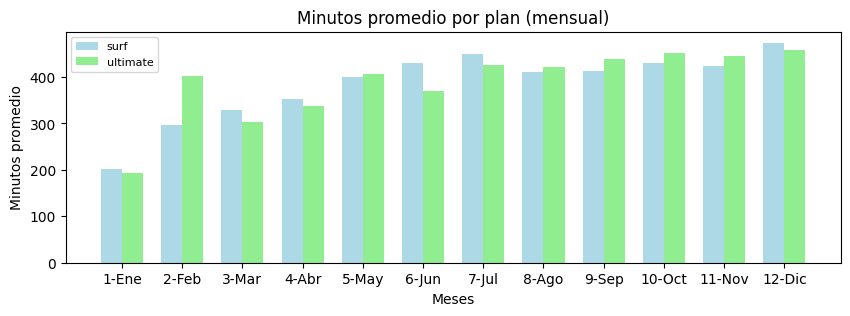


El promedio mensual duracion en minutos de las llamadas de cada plan es:

 month         1       2       3       4       5       6       7       8   \
plan_name                                                                  
surf       203.0  297.00  330.00  351.54  399.58  431.30  449.98  410.11   
ultimate   193.5  403.14  304.25  336.86  406.24  370.96  427.07  421.44   

month          9       10      11      12  
plan_name                                  
surf       414.23  429.73  423.33  473.84  
ultimate   437.51  450.74  445.20  459.10  



In [298]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Filtro de dataset por tipo de planes

min_surf = usuarios_consumos_tarifa[usuarios_consumos_tarifa['plan_name']=='surf']

min_ultimate = usuarios_consumos_tarifa[usuarios_consumos_tarifa['plan_name']=='ultimate']

# Gráfico comparación minutos promedio planes por mes

mean_min_plan_surf = round(min_surf.groupby(['month'])[['total_min_month']].mean(),0)

mean_min_plan_ultimate = round(min_ultimate.groupby(['month'])[['total_min_month']].mean(),0)

meses = ['1-Ene','2-Feb','3-Mar','4-Abr','5-May','6-Jun','7-Jul','8-Ago','9-Sep','10-Oct','11-Nov','12-Dic']

x = np.arange(len(meses))  # Posiciones de las barras en el eje x
width = 0.35  # Ancho de las barras

plt.figure(figsize=(10,3))
plt.bar(x - width/2, mean_min_plan_surf['total_min_month'], width, label='min prom usuarios', color='lightblue')
plt.bar(x + width/2, mean_min_plan_ultimate['total_min_month'], width, label='min plan', color='lightgreen')

plt.xlabel('Meses')
plt.ylabel('Minutos promedio')
plt.title('Minutos promedio por plan (mensual)')
plt.xticks(x, meses)
plt.legend(['surf','ultimate'], prop={'size':8})

plt.show()

# Tabla minutos promedio mensual por plan

mean_min_plans = round(usuarios_consumos_tarifa.pivot_table(index='plan_name', columns='month', values='total_min_month', aggfunc='mean'),2)

print()
print('El promedio mensual duracion en minutos de las llamadas de cada plan es:\n\n', mean_min_plans)
print()

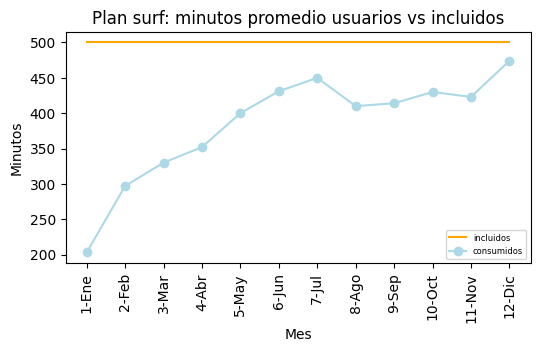

In [301]:
# Compara la duración promedio de llamadas por cada plan y por cada mes.
# Gráfico de lineas por plan contra minutos otorgados mensualmente

minutos_surf = [500,500,500,500,500,500,500,500,500,500,500,500]

minutos_ultimate = [3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000]

plt.figure(figsize=(6,3))
plt.plot(meses, minutos_surf, label='minutos incluidos', color='orange')
plt.plot(meses, mean_min_plan_surf['total_min_month'], label='minutos consumidos', marker= 'o', color='lightblue')
plt.xlabel('Mes')
plt.ylabel('Minutos')
plt.title('Plan surf: minutos promedio usuarios vs incluidos')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.legend(['incluidos','consumidos'], prop={'size':6})
plt.show()

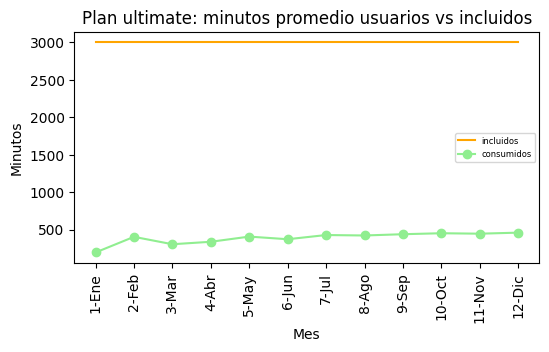

In [303]:
# Gráfico de lineas por plan contra minutos otorgados mensualmente

plt.figure(figsize=(6,3))
plt.plot(meses, minutos_ultimate, label='minutos incluidos', color='orange')
plt.plot(meses, mean_min_plan_ultimate['total_min_month'], label='minutos consumidos', marker= 'o', color='lightgreen')
plt.xlabel('Mes')
plt.ylabel('Minutos')
plt.title('Plan ultimate: minutos promedio usuarios vs incluidos')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.legend(['incluidos','consumidos'], prop={'size':6})
plt.show()

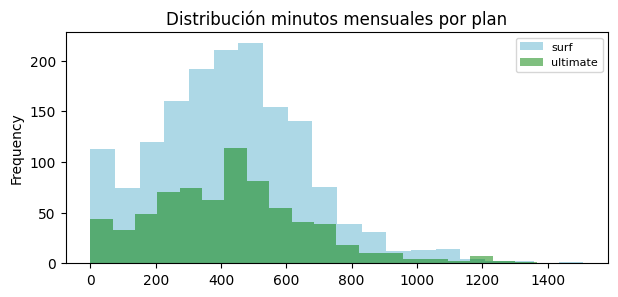

In [246]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

plt.figure(figsize=(7,3))  # Tamaño del gráfico

min_surf['total_min_month'].plot(kind='hist', bins=20, title='Distribución minutos mensuales por plan', xlabel='Minutos', ylabel='Frecuencia', color='lightblue')

min_ultimate['total_min_month'].plot(kind='hist', bins=20, color='green', alpha=0.5)

plt.legend(['surf','ultimate'], prop={'size':8})

plt.show()

Histograma con curva de densidades plan "surf":



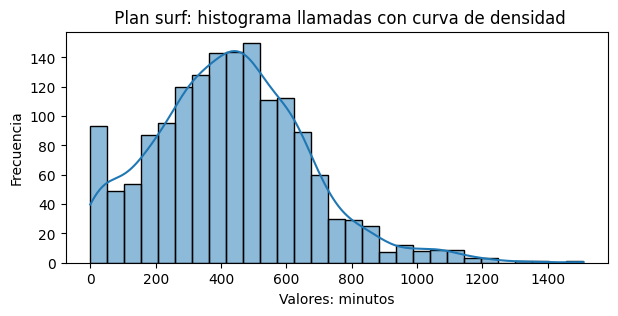

In [247]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

print('Histograma con curva de densidades plan "surf":')
print()

plt.figure(figsize=(7,3))  # Tamaño del gráfico

sns.histplot(min_surf['total_min_month'], kde=True)  # histograma con curva de densidades

plt.title(' Plan surf: histograma llamadas con curva de densidad')
plt.xlabel('Valores: minutos')
plt.ylabel('Frecuencia')

plt.show()

Histograma con curva de densidades plan "ultimate":



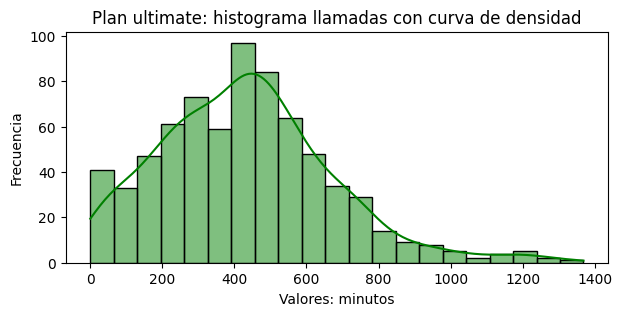

In [248]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

print('Histograma con curva de densidades plan "ultimate":')
print()

plt.figure(figsize=(7,3))

sns.histplot(min_ultimate['total_min_month'], kde=True, color='green', line_kws={'color':'red'})  # histograma con curva de densidades

plt.title('Plan ultimate: histograma llamadas con curva de densidad')
plt.xlabel('Valores: minutos')
plt.ylabel('Frecuencia')

plt.show()

In [249]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Plan surf:

mean_min_surf = min_surf['total_min_month'].mean()   # media

median_min_surf = min_surf['total_min_month'].median() # mediana

var_min_surf = np.var(min_surf['total_min_month'])  # varianza

dev_std_min_surf= np.sqrt(var_min_surf)  # desviación estándar

# Plan ultimate:

mean_min_ultimate = min_ultimate['total_min_month'].mean()  # media

median_min_ultimate = min_ultimate['total_min_month'].median() # mediana

var_min_ultimate = np.var(min_ultimate['total_min_month'])  # varianza

dev_std_min_utimate = np.sqrt(var_min_ultimate)  # desviación estándar

print('Estadísticos llamadas plan "surf":')
print()
print('Media:', mean_min_surf)
print()
print('Mediana:', median_min_surf)
print()
print('Varianza:', var_min_surf)
print()
print('Desviavión estándar:', dev_std_min_surf)
print()

print('Estadísticos llamadas plan "ultimate":')
print()
print('Media:', mean_min_ultimate)
print()
print('Mediana:', median_min_ultimate)
print()
print('Varianza:', var_min_ultimate)
print()
print('Desviavión estádar:', dev_std_min_utimate)

Estadísticos llamadas plan "surf":

Media: 428.7495232040687

Mediana: 425.0

Varianza: 54933.334591317485

Desviavión estándar: 234.37861376695076

Estadísticos llamadas plan "ultimate":

Media: 430.45

Mediana: 424.0

Varianza: 57764.12527777777

Desviavión estádar: 240.34168443650753


Estadisticas rápidas:

 count    1573.000000
mean      428.749523
std       234.453150
min         0.000000
25%       272.000000
50%       425.000000
75%       576.000000
max      1510.000000
Name: total_min_month, dtype: float64

Diagrama de caja para duración de llamadas del plan "surf":



Text(0.5, 1.0, 'Plan surf: gráfico de caja minutos de llamadas')

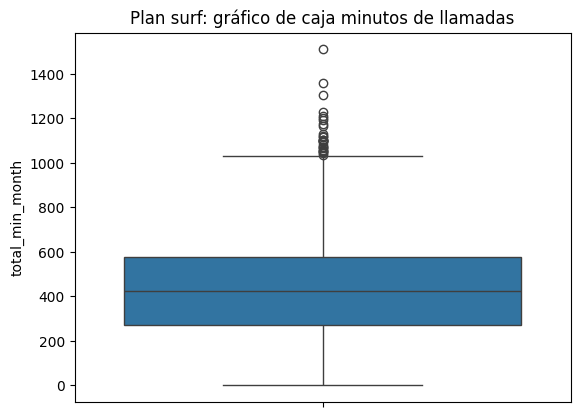

In [250]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

print('Estadisticas rápidas:\n\n', min_surf['total_min_month'].describe())
print()

print('Diagrama de caja para duración de llamadas del plan "surf":')
print()

sns.boxplot(min_surf['total_min_month'])

plt.title('Plan surf: gráfico de caja minutos de llamadas')

Estadisticas rápidas:

 count     720.000000
mean      430.450000
std       240.508762
min         0.000000
25%       260.000000
50%       424.000000
75%       565.250000
max      1369.000000
Name: total_min_month, dtype: float64

Diagrama de caja para duración de llamadas del plan "ultimate":



Text(0.5, 1.0, 'Plan ultimate: gráfico de caja minutos de llamadas')

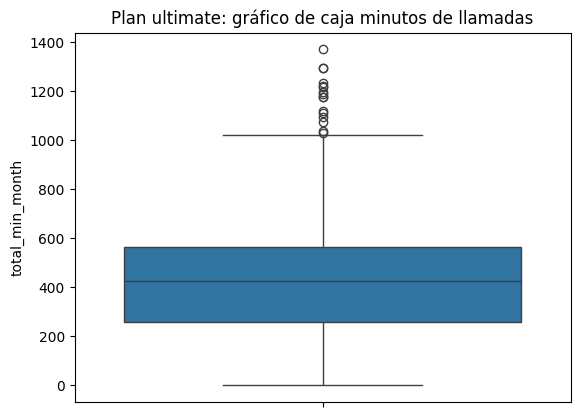

In [251]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

print('Estadisticas rápidas:\n\n', min_ultimate['total_min_month'].describe())
print()

print('Diagrama de caja para duración de llamadas del plan "ultimate":')
print()

sns.boxplot(min_ultimate['total_min_month'])

plt.title('Plan ultimate: gráfico de caja minutos de llamadas')

In [252]:
# Calculo de correlación duración de llamada y costo total de pago de plan.

print('Correlación duración de la llamada y el costo total del servicio en plan "surf":', min_surf['total_min_month'].corr(min_surf['ingresos_totales']))
print()
print('Correlación duración de la llamada y el costo total del servicio en plan "ultimate":', min_ultimate['total_min_month'].corr(min_ultimate['ingresos_totales']))

Correlación duración de la llamada y el costo total del servicio en plan "surf": 0.28398714163393707

Correlación duración de la llamada y el costo total del servicio en plan "ultimate": -0.06930072170916583


**Comportamiento de usuarios: Llamadas**

El valor promedio de los minutos usados tanto en el plan “surf” como en el plan “ultimate” es similar en cada uno de los meses (gráfico “Minutos promedio por plan (mensual)”). Únicamente el mes de Febrero (2) los usuarios del plan “ultimate” tienen un pico superior destacado. Por otra parte, los usuarios del plan “surf” tienen ligeros picos superiores en los meses de Marzo (3), Abril (4), Junio (6), Julio (7) y Diciembre (12).

Haciendo una revisión del consumo mensual contra los minutos otorgados por cada plan:

* El gráfico “Plan surf: minutos promedio usuarios vs incluidos” muestra que en ningún mes el promedio de minutos consumidos es superior a los minutos incluidos en el plan. Los meses de Julio y Diciembre presentan los picos mas altos más cercados al límite.

* El gráfico “Plan ultimate: minutos promedio usuarios vs incluidos” muestra que realmente el consumo promedio mensual de minutos es mucho menor al otorgado mensualmente, en promedio los usuarios consumen abajo del 20% de los minutos disponibles mensualmente.


Con base a lo anterior en el plan “surf” es más probable que en los meses de Julio y Diciembre se logren ingresos adicionales por consumo de minutos superiores a los disponibles por parte de los usuarios.

En cuanto a la distribución de los minutos utilizados y mostrados en el histograma “Distribución minutos mensuales por plan” encontramos que ambas distribuciones normales y ambas son similares, encontrando su valor medio entre los 428 y 430 minutos y una alta concentración de valores alrededor de la media.

Valores estadísticos:

* Plan surf:

 - Media: 428.75
 - Mediana: 425
 - Varianza: 54933
 - Desviación estándar: 234.38

 El gráfico de caja de este plan nos indica:
 - Existen valores atípicos fuera del límite superior, con el máximo valor en 1,510.
 - Primer cuartil en el valor: 272
 - Segundo cuartil (mediana): 425
 - Tercer cuartil en el valor: 576
 - IQR = 304

* Plan ultimate:

 - Media: 430.45
 - Mediana: 424
 - Varianza: 57764
 - Desviación estándar: 240.34

 El gráfico de caja de este plan nos indica:
 - Existen valores atípicos fuera del límite superior, con el máximo valor en 1,369.
 - Primer cuartil en el valor: 260
 - Segundo cuartil (mediana): 424
 - Tercer cuartil en el valor: 565
 - IQR = 305

Se calculó el coeficiente de correlación de los minutos consumidos contra el pago total del servicio (cuota del plan + gastos de consumos extras) realizado por mes por el usuario, encontrando:

* Coeficiente de correlación plan surf: 0.283987141633937, correlación positiva, aunque relativamente baja, indica que si el usuario aumenta sus minutos tendrá que pagar más al cierre del mes.

* Coeficiente de correlación plan ultimate: -0.0693007217091659, correlación negativa, aunque el usuario aumente sus minutos, no tendrá que pagar más, que se relaciona con el bajo consumo de los minutos otorgados mensualmente mencionados anteriormente.

#### **Mensajes**

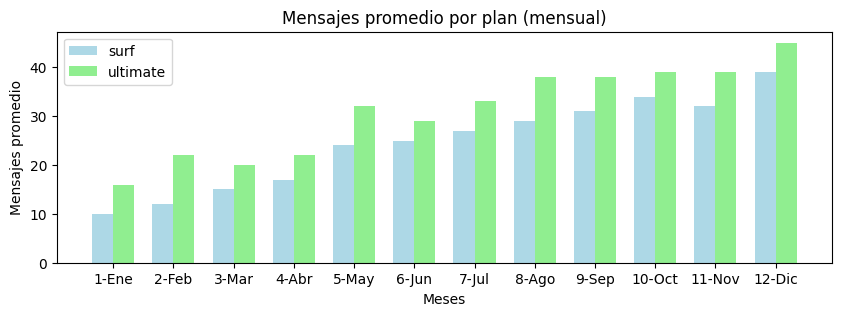


El promedio mensual de mensajes consumidos de cada plan es:

 month        1     2     3     4     5     6     7     8     9     10    11  \
plan_name                                                                     
surf       10.0  12.0  15.0  17.0  24.0  25.0  27.0  29.0  31.0  34.0  32.0   
ultimate   16.0  22.0  20.0  22.0  32.0  29.0  33.0  38.0  38.0  39.0  39.0   

month        12  
plan_name        
surf       39.0  
ultimate   45.0  



In [253]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Gráfico comparación mensajes promedio planes por mes

mean_messages_plan_surf = round(min_surf.groupby(['month'])[['total_messages_month']].mean(),0)

mean_messages_plan_ultimate = round(min_ultimate.groupby(['month'])[['total_messages_month']].mean(),0)

plt.figure(figsize=(10,3))

plt.bar(x - width/2, mean_messages_plan_surf['total_messages_month'], width, label='messagges prom usuarios', color='lightblue')
plt.bar(x + width/2, mean_messages_plan_ultimate['total_messages_month'], width, label='messages plan', color='lightgreen')

plt.xlabel('Meses')
plt.ylabel('Mensajes promedio')
plt.title('Mensajes promedio por plan (mensual)')
plt.xticks(x, meses)
plt.legend(['surf','ultimate'])

plt.show()

# Tabla mensajes promedio mensual por plan

mean_messages_plans = round(usuarios_consumos_tarifa.pivot_table(index='plan_name', columns='month', values='total_messages_month', aggfunc='mean'),0)

print()
print('El promedio mensual de mensajes consumidos de cada plan es:\n\n', mean_messages_plans)
print()

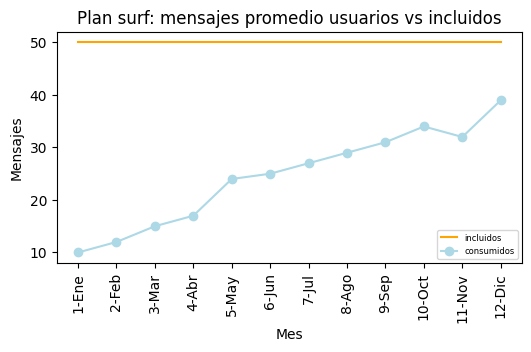

In [304]:
# Gráfico de lineas por plan contra mensajes otorgados mensualmente

messages_surf = [50,50,50,50,50,50,50,50,50,50,50,50]

messages_ultimate = [1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000]

plt.figure(figsize=(6,3))
plt.plot(meses, messages_surf, label='mensajes incluidos', color='orange')
plt.plot(meses, mean_messages_plan_surf['total_messages_month'], label='mensajes consumidos', marker= 'o', color='lightblue')
plt.xlabel('Mes')
plt.ylabel('Mensajes')
plt.title('Plan surf: mensajes promedio usuarios vs incluidos')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.legend(['incluidos','consumidos'], prop={'size':6})
plt.show()

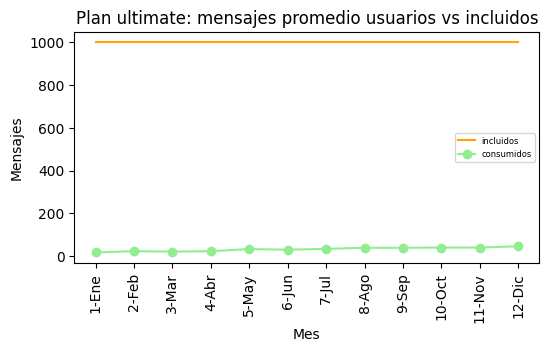

In [305]:
# Gráfico de lineas por plan contra mensajes otorgados mensualmente

plt.figure(figsize=(6,3))
plt.plot(meses, messages_ultimate, label='mensajes incluidos', color='orange')
plt.plot(meses, mean_messages_plan_ultimate['total_messages_month'], label='mensajes consumidos', marker= 'o', color='lightgreen')
plt.xlabel('Mes')
plt.ylabel('Mensajes')
plt.title('Plan ultimate: mensajes promedio usuarios vs incluidos')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.legend(['incluidos','consumidos'], prop={'size':6})
plt.show()

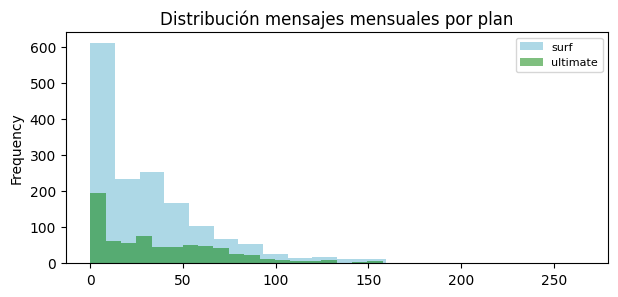

In [256]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.

plt.figure(figsize=(7,3))

min_surf['total_messages_month'].plot(kind='hist', bins=20, title='Distribución mensajes mensuales por plan', xlabel='Mensajes', ylabel='Frecuencia', color='lightblue')

min_ultimate['total_messages_month'].plot(kind='hist', bins=20, color='green', alpha=0.5)

plt.legend(['surf','ultimate'], prop={'size':8})

plt.show()

Histograma con curva de densidades plan "surf":



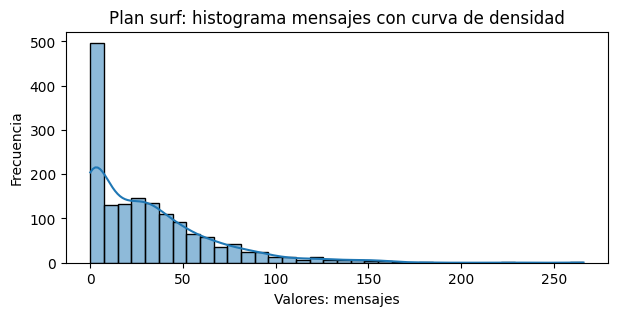

In [257]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.

print('Histograma con curva de densidades plan "surf":')
print()

plt.figure(figsize=(7,3))

sns.histplot(min_surf['total_messages_month'], kde=True, line_kws={'color':'red'})  # histograma con curva de densidades

plt.title('Plan surf: histograma mensajes con curva de densidad')
plt.xlabel('Valores: mensajes')
plt.ylabel('Frecuencia')

plt.show()

Histograma con curva de densidades plan "ultimate":



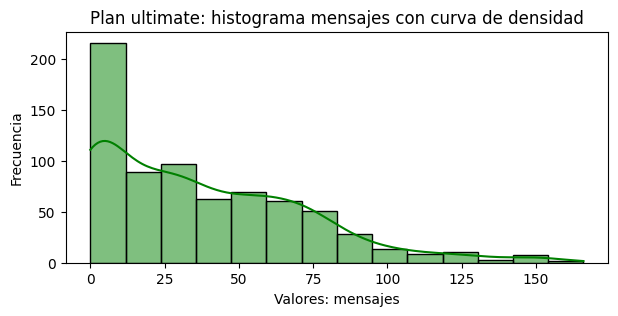

In [258]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.

print('Histograma con curva de densidades plan "ultimate":')
print()

plt.figure(figsize=(7,3))

sns.histplot(min_ultimate['total_messages_month'], kde=True, color='green', line_kws={'color':'red'})  # histograma con curva de densidades

plt.title('Plan ultimate: histograma mensajes con curva de densidad')
plt.xlabel('Valores: mensajes')
plt.ylabel('Frecuencia')

plt.show()

In [259]:
# Calcula la media y la varianza de los mensajes consumidos por los usuarios.

# Plan surf:

mean_messages_surf = min_surf['total_messages_month'].mean()   # media

median_messages_surf = min_surf['total_messages_month'].median() # mediana

var_messages_surf = np.var(min_surf['total_messages_month'])  # varianza

dev_std_messages_surf= np.sqrt(var_messages_surf)  # desviación estándar

# Plan ultimate:

mean_messages_ultimate = min_ultimate['total_messages_month'].mean()  # media

median_messages_ultimate = min_ultimate['total_messages_month'].median() # mediana

var_messages_ultimate = np.var(min_ultimate['total_messages_month'])  # varianza

dev_std_messages_utimate = np.sqrt(var_messages_ultimate)  # desviación estándar

print('Estadísticos mensajes plan "surf":')
print()
print('Media:', mean_messages_surf)
print()
print('Mediana:', median_messages_surf)
print()
print('Varianza:', var_messages_surf)
print()
print('Desviavión estándar:', dev_std_messages_surf)
print()

print('Estadísticos mensajes plan "ultimate":')
print()
print('Media:', mean_messages_ultimate)
print()
print('Mediana:', median_messages_ultimate)
print()
print('Varianza:', var_messages_ultimate)
print()
print('Desviavión estádar:', dev_std_messages_utimate)

Estadísticos mensajes plan "surf":

Media: 31.15956770502225

Mediana: 24.0

Varianza: 1126.0082317266622

Desviavión estándar: 33.556046127734746

Estadísticos mensajes plan "ultimate":

Media: 37.55138888888889

Mediana: 30.0

Varianza: 1207.0779147376543

Desviavión estádar: 34.743026850544474


Estadisticas rápidas mensajes plan "surf":

 count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: total_messages_month, dtype: float64

Diagrama de caja para mensajes del plan "surf":



Text(0.5, 1.0, 'Plan surf: gráfico de caja mensajes')

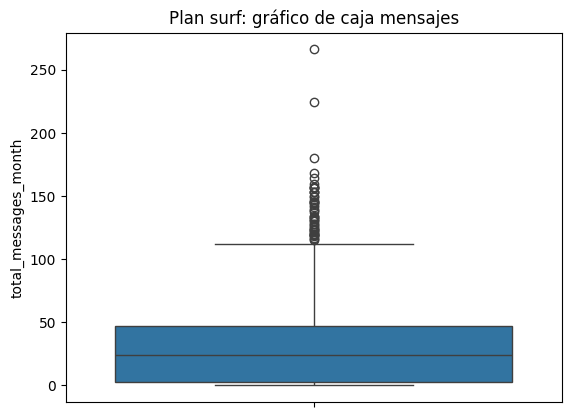

In [260]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes

print('Estadisticas rápidas mensajes plan "surf":\n\n', min_surf['total_messages_month'].describe())
print()

print('Diagrama de caja para mensajes del plan "surf":')
print()

sns.boxplot(min_surf['total_messages_month'])

plt.title('Plan surf: gráfico de caja mensajes')

Estadisticas rápidas mensajes plan "ultimate":

 count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: total_messages_month, dtype: float64

Diagrama de caja para mensajes del plan "ultimate":



Text(0.5, 1.0, 'Plan ultimate: gráfico de caja mensajes')

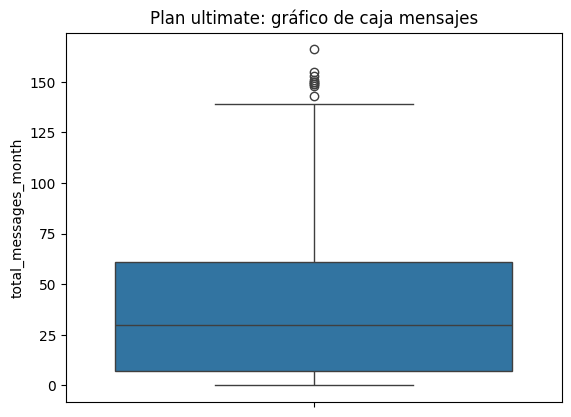

In [261]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes

print('Estadisticas rápidas mensajes plan "ultimate":\n\n', min_ultimate['total_messages_month'].describe())
print()

print('Diagrama de caja para mensajes del plan "ultimate":')
print()

sns.boxplot(min_ultimate['total_messages_month'])

plt.title('Plan ultimate: gráfico de caja mensajes')

In [262]:
# Calculo de correlación mensajes enviados y costo total de pago de plan.

print('Correlación mensajes enviados y el costo total del servicio en plan "surf":', min_surf['total_messages_month'].corr(min_surf['ingresos_totales']))
print()
print('Correlación mensajes enviados y el costo total del servicio en plan "ultimate":', min_ultimate['total_messages_month'].corr(min_ultimate['ingresos_totales']))

Correlación mensajes enviados y el costo total del servicio en plan "surf": 0.16829898902049986

Correlación mensajes enviados y el costo total del servicio en plan "ultimate": 0.18721475475809776


**Comportamiento de usuarios: Mensajes**

Los usuarios del plan “ultimate” consistentemente envían más mensajes de forma mensual que los usuarios del plan “surf” (gráfico “mensajes promedio por plan (mensual). En ambos casos el envío se incrementa mes a mes siendo el mes de enero el mas bajo y diciembre el mas alto en envío de mensajes.

Haciendo una revisión del envío mensual de mensajes promedio contra los mensajes otorgados por cada plan:

  * El gráfico “Mensajes promedio usuarios vs incluidos plan surf” indica que en ningún mes del año se envían más mensajes de los que otorga el plan (50), estando consistentemente debajo del límite, únicamente el mes de diciembre se acerca al máximo.

  * El gráfico “Mensajes promedio usuarios vs incluidos plan ultimate” muestra que el uso de mensajes esta muy por debajo de los otorgados (1,000), en este aspecto no se consume, el valor máximo de enviados es de 166 que solo representa el 16.6% de lo autorizado.

  * Con base a lo anterior, los mensajes representan una fuente muy poco probable de ingresos mensuales extra con los límites actualmente otorgados.

En cuanto a la distribución de los mensajes enviados y mostrados en el histograma “Distribución mensajes mensuales por plan” encontramos que ambas distribuciones están sesgadas a la derecha y ambas son similares, encontrando su valor medio entre los 31 y 37 mensajes. La media es mayor que la mediana de esta distribución.

Valores estadísticos:

Plan surf:

	* Media: 31.16
	* Mediana: 24
	* Varianza: 1,126
	* Desviación estándar: 33.56

El gráfico de caja de este plan nos indica:

  * Existen bastantes valores atípicos fuera del límite superior, con el máximo valor en 266.
	* Primer cuartil en el valor: 3
	* Segundo cuartil (mediana): 24
	* Tercer cuartil en el valor: 47
    * IQR = 44

Plan ultimate:

	* Media: 37.55
	* Mediana: 30
	* Varianza:1,207
	* Desviación estándar: 34.74
    

El gráfico de caja de este plan nos indica:

  * Existen bastantes valores atípicos fuera del límite superior, con el máximo valor en 166.
	* Primer cuartil en el valor: 7
	* Segundo cuartil (mediana): 30
	* Tercer cuartil en el valor: 61
    * IQR = 54


Se calculó el coeficiente de correlación de los mensajes enviados contra el pago total del servicio (cuota del plan + gastos de consumos extras) realizado por mes por el usuario, encontrando:


* Coeficiente de correlación plan surf: 0.16829898902049978, correlación positiva, aunque relativamente baja, indica que si el usuario aumenta sus mensajes enviados tendrá que pagar más al cierre del mes.

* Coeficiente de correlación plan ultimate: 0.1872147547580978, correlación positiva, aunque relativamente baja, indica que si el usuario aumenta sus mensajes enviados tendrá que pagar más al cierre del mes.


#### **Internet**

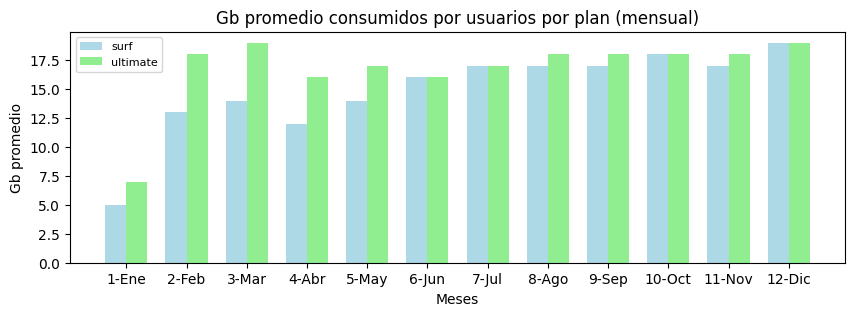


El promedio mensual de interntet (gb) consumidos de cada plan es:

 month        1      2      3      4      5      6      7      8      9   \
plan_name                                                                 
surf       5.00  12.67  13.78  12.42  14.45  15.76  17.30  17.25  17.07   
ultimate   7.25  17.57  18.83  16.48  17.07  15.83  16.81  18.38  17.53   

month         10     11     12  
plan_name                       
surf       17.77  16.84  18.61  
ultimate   18.08  17.54  18.84  



In [263]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

mean_internet_plan_surf = round(min_surf.groupby(['month'])[['total_gb_month']].mean(),0)

mean_internet_plan_ultimate = round(min_ultimate.groupby(['month'])[['total_gb_month']].mean(),0)

plt.figure(figsize=(10,3))

plt.bar(x - width/2, mean_internet_plan_surf['total_gb_month'], width, label='gb prom usuarios', color='lightblue')
plt.bar(x + width/2, mean_internet_plan_ultimate['total_gb_month'], width, label='gb plan', color='lightgreen')

plt.xlabel('Meses')
plt.ylabel('Gb promedio')
plt.title('Gb promedio consumidos por usuarios por plan (mensual)')
plt.xticks(x, meses)
plt.legend(['surf','ultimate'], prop={'size':8})

plt.show()

# Tabla gb promedio mensual por plan

mean_gb_plans = round(usuarios_consumos_tarifa.pivot_table(index='plan_name', columns='month', values='total_gb_month', aggfunc='mean'),2)

print()
print('El promedio mensual de interntet (gb) consumidos de cada plan es:\n\n', mean_gb_plans)
print()

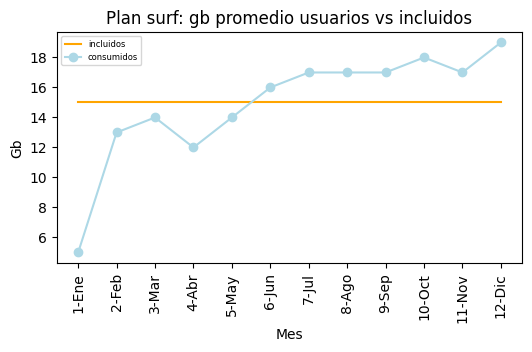

In [306]:
# Gráfico de lineas por plan gb otorgados mensualmente

gb_surf = [15,15,15,15,15,15,15,15,15,15,15,15]

gb_ultimate = [30,30,30,30,30,30,30,30,30,30,30,30]

plt.figure(figsize=(6,3))
plt.plot(meses, gb_surf, label='Gb incluidos', color='orange')
plt.plot(meses, mean_internet_plan_surf['total_gb_month'], label='Gb consumidos', marker= 'o', color='lightblue')
plt.xlabel('Mes')
plt.ylabel('Gb')
plt.title('Plan surf: gb promedio usuarios vs incluidos')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.legend(['incluidos','consumidos'], prop={'size':6})
plt.show()

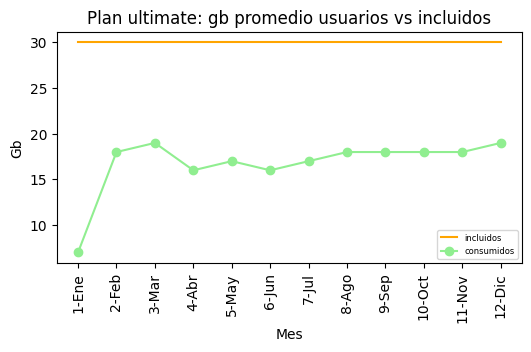

In [307]:
# Gráfico de lineas por plan contra mensajes otorgados mensualmente

plt.figure(figsize=(6,3))
plt.plot(meses, gb_ultimate, label='Gb incluidos', color='orange')
plt.plot(meses, mean_internet_plan_ultimate['total_gb_month'], label='Gb consumidos', marker= 'o', color='lightgreen')
plt.xlabel('Mes')
plt.ylabel('Gb')
plt.title('Plan ultimate: gb promedio usuarios vs incluidos')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.legend(['incluidos','consumidos'], prop={'size':6})
plt.show()

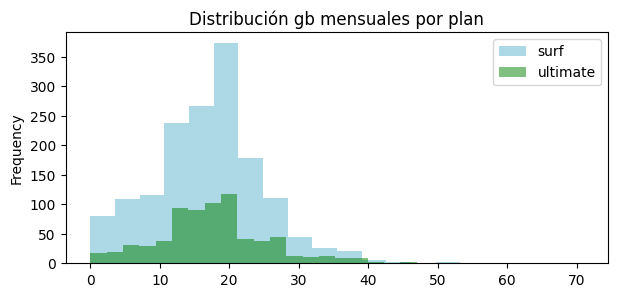

In [266]:
# Compara el número de GB mensuales que necesitan los usuarios de cada plan. Traza un histograma.

plt.figure(figsize=(7,3))

min_surf['total_gb_month'].plot(kind='hist', bins=20, title='Distribución gb mensuales por plan', xlabel='Gb', ylabel='Frecuencia', color='lightblue')

min_ultimate['total_gb_month'].plot(kind='hist', bins=20, color='green', alpha=0.5)

plt.legend(['surf','ultimate'])

plt.show()

Histograma con curva de densidades plan "surf":



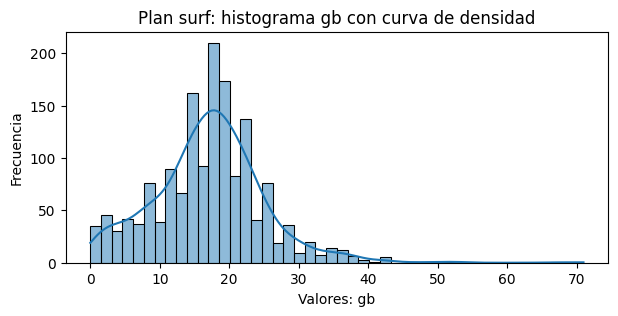

In [267]:
# Compara el número gb que necesitan los usuarios de cada plan. Traza un histograma.

print('Histograma con curva de densidades plan "surf":')
print()

plt.figure(figsize=(7,3))

sns.histplot(min_surf['total_gb_month'], kde=True, line_kws={'color':'red'})  # histograma con curva de densidades

plt.title('Plan surf: histograma gb con curva de densidad')
plt.xlabel('Valores: gb')
plt.ylabel('Frecuencia')

plt.show()

Histograma con curva de densidades plan "ultimate":



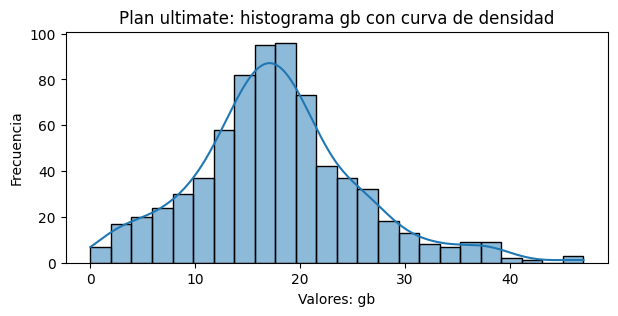

In [268]:
# Compara el número de gb mensuales que necesitan los usuarios de cada plan. Traza un histograma.

print('Histograma con curva de densidades plan "ultimate":')
print()

plt.figure(figsize=(7,3))

sns.histplot(min_ultimate['total_gb_month'], kde=True, line_kws={'color':'red'})  # histograma con curva de densidades

plt.title('Plan ultimate: histograma gb con curva de densidad')
plt.xlabel('Valores: gb')
plt.ylabel('Frecuencia')

plt.show()

In [269]:
# Calcula la media y la varianza de los mensajes consumidos por los usuarios.

# Plan surf:

mean_internet_surf = min_surf['total_gb_month'].mean()   # media

median_internet_surf = min_surf['total_gb_month'].median() # mediana

var_internet_surf = np.var(min_surf['total_gb_month'])  # varianza

dev_std_internet_surf= np.sqrt(var_internet_surf)  # desviación estándar

# Plan ultimate:

mean_internet_ultimate = min_ultimate['total_gb_month'].mean()  # media

median_internet_ultimate = min_ultimate['total_gb_month'].median() # mediana

var_internet_ultimate = np.var(min_ultimate['total_gb_month'])  # varianza

dev_std_internet_utimate = np.sqrt(var_internet_ultimate)  # desviación estándar

print('Estadísticos internet plan "surf":')
print()
print('Media:', mean_internet_surf)
print()
print('Mediana:', median_internet_surf)
print()
print('Varianza:', var_internet_surf)
print()
print('Desviavión estándar:', dev_std_internet_surf)
print()

print('Estadísticos internet plan "ultimate":')
print()
print('Media:', mean_internet_ultimate)
print()
print('Mediana:', median_internet_ultimate)
print()
print('Varianza:', var_internet_ultimate)
print()
print('Desviavión estádar:', dev_std_internet_utimate)

Estadísticos internet plan "surf":

Media: 17.037507946598854

Mediana: 17.0

Varianza: 64.2217336498097

Desviavión estándar: 8.013846370489624

Estadísticos internet plan "ultimate":

Media: 17.719444444444445

Mediana: 17.0

Varianza: 61.77684413580247

Desviavión estádar: 7.859824688617582


Estadisticas rápidas internet plan "surf":

 count    1573.000000
mean       17.037508
std         8.016395
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        71.000000
Name: total_gb_month, dtype: float64

Diagrama de caja para internet del plan "surf":



Text(0.5, 1.0, 'Plan surf: gráfico de caja gb')

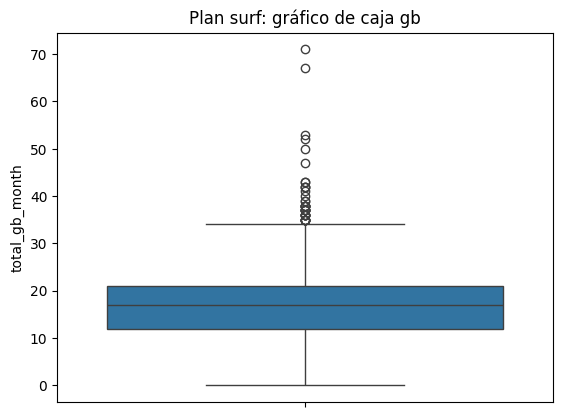

In [270]:
# Traza un diagrama de caja para visualizar la distribución de los gb

print('Estadisticas rápidas internet plan "surf":\n\n', min_surf['total_gb_month'].describe())
print()

print('Diagrama de caja para internet del plan "surf":')
print()

sns.boxplot(min_surf['total_gb_month'])

plt.title('Plan surf: gráfico de caja gb')

Estadisticas rápidas internet plan "ultimate":

 count    720.000000
mean      17.719444
std        7.865289
min        0.000000
25%       13.000000
50%       17.000000
75%       22.000000
max       47.000000
Name: total_gb_month, dtype: float64

Diagrama de caja para internet del plan "ultimate":



Text(0.5, 1.0, 'Plan ultimate: gráfico de caja gb')

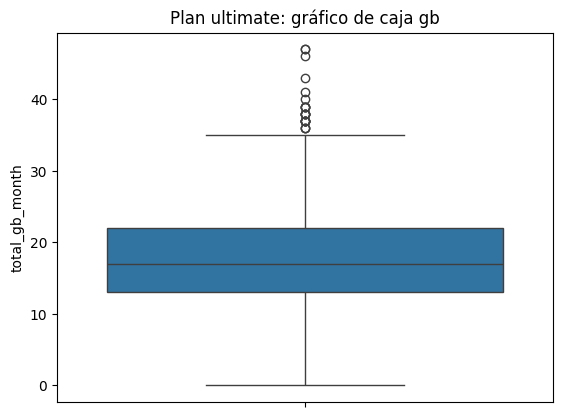

In [271]:
# Traza un diagrama de caja para visualizar la distribución de los gb

print('Estadisticas rápidas internet plan "ultimate":\n\n', min_ultimate['total_gb_month'].describe())
print()

print('Diagrama de caja para internet del plan "ultimate":')
print()

sns.boxplot(min_ultimate['total_gb_month'])

plt.title('Plan ultimate: gráfico de caja gb')

In [272]:
# Calculo de correlación gb consumidos y costo total de pago de plan.

print('Correlación gb consumidos y el costo total del servicio en plan "surf":', min_surf['total_gb_month'].corr(min_surf['ingresos_totales']))
print()
print('Correlación gb consumidos y el costo total del servicio en plan "ultimate":', min_ultimate['total_gb_month'].corr(min_ultimate['ingresos_totales']))

Correlación gb consumidos y el costo total del servicio en plan "surf": 0.8993788850903577

Correlación gb consumidos y el costo total del servicio en plan "ultimate": 0.574118439970335


**Comportamiento de usuarios: Internet**

En los primeros 5 meses de al año (enero a mayo) presentan un marcado mayor consumo de Gigabytes (gb) así como un ligero incremento en los meses de agosto y septiembre sobre los usuarios del plan surf. El resto de los meses (junio, julio, octubre y diciembre) el comportamiento de consumo es similar.

Haciendo una revisión al consumo mensual de gb promedio contra los otorgados por cada plan:

* El gráfico “Plan surf: gb promedio usuarios vs incluidos'”, indica que los usuarios de este plan regularmente están cerca y arriba del límite, excepto por el mes de enero que presenta el consumo mas bajo, por otra parte a partir del mes de junio a diciembre se encuentran sobre el límite.

* El gráfico “Plan ultimate: gb promedio usuarios vs incluidos”, muestra que el consumo de gb por parte de los usuarios de este plan en promedio no llega al límite, oscilando su consumo mensual entre el 56% y el 60% de su límite en prácticamente todo el año.

Con base a lo anterior, el consumo de internet con los usuarios del plan “surf” presenta una oportunidad importante de ingresos extra para la compañía.

En cuanto a la distribución de los gb consumidos y mostrados en el histograma “Distribución gb mensuales por plan” encontramos que ambas distribuciones tienen un comportamiento normal con la mayoría de los valores alrededor de la media.

Valores estadísticos:

Plan surf:
* Media: 17.03
* Mediana: 17
* Varianza: 64.22
* Desviación estándar: 8.01

El gráfico de caja de este plan nos indica:

* Existen bastantes valores atípicos fuera del límite superior, con el máximo valor en 71.
* Primer cuartil en el valor: 12
* Segundo cuartil (mediana): 17
* Tercer cuartil en el valor: 21
* IQR: 9

Plan ultimate:
* Media: 17.72
* Mediana: 17
* Varianza: 61.77
* Desviación estándar: 7.86

El gráfico de caja de este plan nos indica:

* Existen bastantes valores atípicos fuera del límite superior, con el máximo valor en 47.
* Primer cuartil en el valor: 13
* Segundo cuartil (mediana): 17
* Tercer cuartil en el valor: 22
* IQR: 9

Se calculó el coeficiente de correlación de los gb consumidos contra el pago total del servicio (cuota del plan + gastos de consumos extras) realizado por mes por el usuario, encontrando:

* Coeficiente de correlación plan surf: 0.899378885090358, correlación positiva, muy cercana a 1, indica que existe una correlación fuerte entre los gb consumidos y el pago total del servicio, mientras más gb consuma mas alto será el pago mensual.

* Coeficiente de correlación plan ultimate: 0.5741184399703343, correlación positiva, indica que si el usuario aumenta sus gb consumidos tendrá que pagar más al cierre del mes, aunque con fuerza media, si influye el consumo de gb con el pago mensual.

### **Análisis de los ingresos**

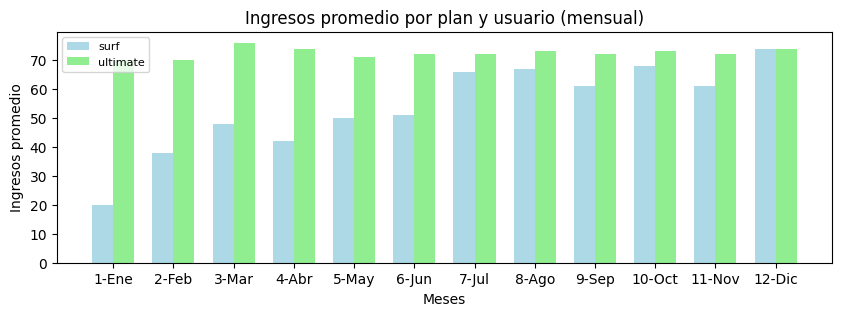


El promedio mensual de ingresos por cada plan es:

 month        1     2     3     4     5     6     7     8     9     10    11  \
plan_name                                                                     
surf       20.0  38.0  48.0  42.0  50.0  51.0  66.0  67.0  61.0  68.0  61.0   
ultimate   70.0  70.0  76.0  74.0  71.0  72.0  72.0  73.0  72.0  73.0  72.0   

month        12  
plan_name        
surf       74.0  
ultimate   74.0  

Usuarios unicos por plan:

 month      1   2   3   4   5   6    7    8    9    10   11   12
plan_name                                                      
surf        2   9  23  50  77  97  121  162  194  237  283  318
ultimate    4   7  12  21  29  47   59   71   86  106  127  151


In [273]:
# Gráfico ingresos promedio por usuario y plan (mensual)

mean_ingresos_plan_surf = round(min_surf.groupby(['month'])[['ingresos_totales']].mean(),0)

mean_ingresos_plan_ultimate = round(min_ultimate.groupby(['month'])[['ingresos_totales']].mean(),0)

meses = ['1-Ene','2-Feb','3-Mar','4-Abr','5-May','6-Jun','7-Jul','8-Ago','9-Sep','10-Oct','11-Nov','12-Dic']

x = np.arange(len(meses))  # Posiciones de las barras en el eje x
width = 0.35  # Ancho de las barras

plt.figure(figsize=(10,3))
plt.bar(x - width/2, mean_ingresos_plan_surf['ingresos_totales'], width, label='ingresos prom', color='lightblue')
plt.bar(x + width/2, mean_ingresos_plan_ultimate['ingresos_totales'], width, label='', color='lightgreen')

plt.xlabel('Meses')
plt.ylabel('Ingresos promedio')
plt.title('Ingresos promedio por plan y usuario (mensual)')
plt.xticks(x, meses)
plt.legend(['surf','ultimate'], prop={'size':8})

plt.show()

# Tabla minutos promedio mensual por plan

mean_ingresos_plans = round(usuarios_consumos_tarifa.pivot_table(index='plan_name', columns='month', values='ingresos_totales', aggfunc='mean'),0)

# Usuarios unicos por plan:

cuenta_usuarios_plan = usuarios_consumos_tarifa.pivot_table(index='plan_name', columns='month', values='user_id', aggfunc='count')

print()
print('El promedio mensual de ingresos por cada plan es:\n\n', mean_ingresos_plans)
print()
print('Usuarios unicos por plan:\n\n', cuenta_usuarios_plan)

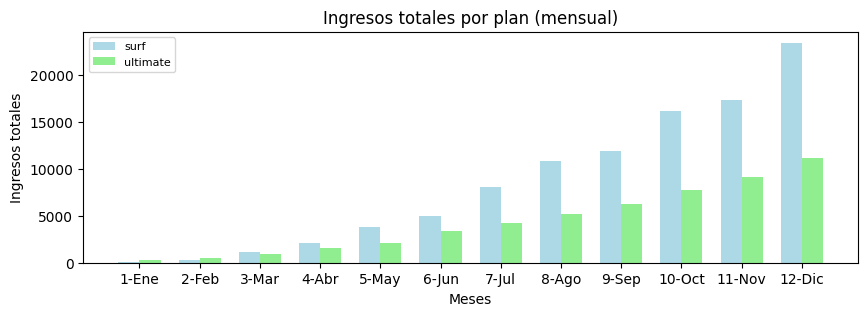


La suma mensual de ingresos por cada plan es:

 month         1      2       3       4       5       6       7        8   \
plan_name                                                                  
surf        40.0  340.0  1107.0  2106.0  3857.0  4980.0  8014.0  10877.0   
ultimate   280.0  490.0   910.0  1547.0  2058.0  3374.0  4256.0   5215.0   

month           9        10       11       12  
plan_name                                      
surf       11855.0  16155.0  17305.0  23427.0  
ultimate    6223.0   7700.0   9142.0  11151.0  



In [274]:
# Gráfico comparación ingresos totales por plan mensual

suma_ingresos_plan_surf = round(min_surf.groupby(['month'])[['ingresos_totales']].sum(),0)

suma_ingresos_plan_ultimate = round(min_ultimate.groupby(['month'])[['ingresos_totales']].sum(),0)

plt.figure(figsize=(10,3))
plt.bar(x - width/2, suma_ingresos_plan_surf['ingresos_totales'], width, label='ingresos totales', color='lightblue')
plt.bar(x + width/2, suma_ingresos_plan_ultimate['ingresos_totales'], width, label='', color='lightgreen')

plt.xlabel('Meses')
plt.ylabel('Ingresos totales')
plt.title('Ingresos totales por plan (mensual)')
plt.xticks(x, meses)
plt.legend(['surf','ultimate'], prop={'size':8})

plt.show()

# Tabla ingresos totales mensuales por plan

suma_ingresos_plans = round(usuarios_consumos_tarifa.pivot_table(index='plan_name', columns='month', values='ingresos_totales', aggfunc='sum'),0)

print()
print('La suma mensual de ingresos por cada plan es:\n\n', suma_ingresos_plans)
print()

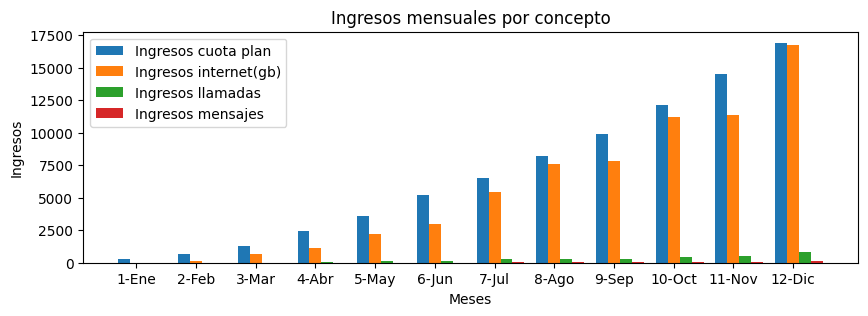



La suma mensual de ingresos por cada concepto es:

        usd_monthly_pay  ingreso_gb  ingreso_llamadas  ingreso_messages  \
month                                                                    
1                  320         0.0               0.0               0.0   
2                  670       150.0               9.0               0.0   
3                 1300       700.0              16.0               0.0   
4                 2470      1127.0              53.0               3.0   
5                 3570      2208.0             128.0              10.0   
6                 5230      2954.0             155.0              14.0   
7                 6550      5436.0             266.0              18.0   
8                 8210      7585.0             268.0              29.0   
9                 9900      7863.0             279.0              36.0   
10               12160     11210.0             425.0              60.0   
11               14550     11342.0             496.0      

In [275]:
# Gráfico ingresos totales por concepto

# Datos filtrados

ingresos_internet_mensual = usuarios_consumos_tarifa.groupby('month')['ingreso_gb'].sum()

ingresos_messages_mensual = usuarios_consumos_tarifa.groupby('month')['ingreso_messages'].sum()

ingresos_llamadas_mensual = usuarios_consumos_tarifa.groupby('month')['ingreso_llamadas'].sum()

ingresos_cuota_plan_mensual = usuarios_consumos_tarifa.groupby('month')['usd_monthly_pay'].sum()

plt.figure(figsize=(10,3))

width2 = 0.2  # Ancho de cada barra

# Gráfico de barras multiples

plt.bar(x - width2, ingresos_cuota_plan_mensual, width=width2, label='Ingresos cuota plan')
plt.bar(x, ingresos_internet_mensual, width=width2, label='Ingresos internet(gb)')
plt.bar(x + width2, ingresos_llamadas_mensual, width=width2, label='Ingresos llamadas')
plt.bar(x + 2*width2, ingresos_messages_mensual, width=width2, label='Ingresos mensajes')


plt.xlabel('Meses')
plt.ylabel('Ingresos')
plt.title('Ingresos mensuales por concepto')
plt.legend()
plt.xticks(x, meses)

plt.show()

print()

# Tabla ingresos totales mensuales porconcepto

ingresos_concepto = round(usuarios_consumos_tarifa.groupby('month')[['usd_monthly_pay','ingreso_gb','ingreso_llamadas','ingreso_messages','ingresos_totales']].sum())

print()
print('La suma mensual de ingresos por cada concepto es:\n\n', ingresos_concepto)
print()

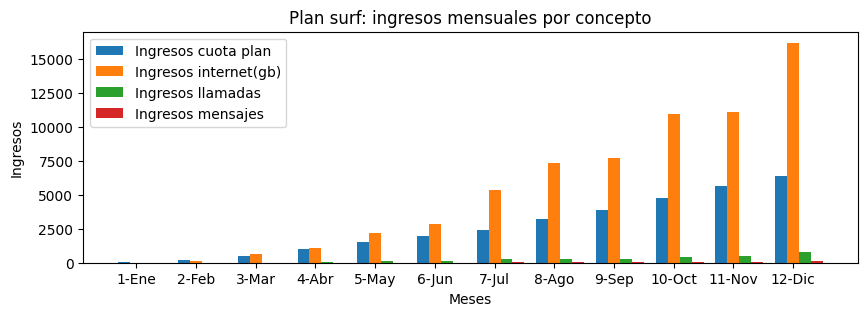



La suma mensual de ingresos por cada concepto del plan surf es:

        usd_monthly_pay  ingreso_gb  ingreso_llamadas  ingreso_messages  \
month                                                                    
1                   40         0.0               0.0               0.0   
2                  180       150.0               9.0               0.0   
3                  460       630.0              16.0               0.0   
4                 1000      1050.0              53.0               3.0   
5                 1540      2180.0             128.0              10.0   
6                 1940      2870.0             155.0              14.0   
7                 2420      5310.0             266.0              18.0   
8                 3240      7340.0             268.0              29.0   
9                 3880      7660.0             279.0              36.0   
10                4740     10930.0             425.0              60.0   
11                5660     11090.0          

In [276]:
# Gráfico ingresos totales por concepto por plan

# Datos filtrados

ingresos_internet_mensual_surf = min_surf.groupby('month')['ingreso_gb'].sum()

ingresos_messages_mensual_surf = min_surf.groupby('month')['ingreso_messages'].sum()

ingresos_llamadas_mensual_surf = min_surf.groupby('month')['ingreso_llamadas'].sum()

ingresos_cuota_plan_mensual_surf = min_surf.groupby('month')['usd_monthly_pay'].sum()

plt.figure(figsize=(10,3))

width2 = 0.2  # Ancho de cada barra

# Gráfico de barras multiples

plt.bar(x - width2, ingresos_cuota_plan_mensual_surf, width=width2, label='Ingresos cuota plan')
plt.bar(x, ingresos_internet_mensual_surf, width=width2, label='Ingresos internet(gb)')
plt.bar(x + width2, ingresos_llamadas_mensual_surf, width=width2, label='Ingresos llamadas')
plt.bar(x + 2*width2, ingresos_messages_mensual_surf, width=width2, label='Ingresos mensajes')


plt.xlabel('Meses')
plt.ylabel('Ingresos')
plt.title('Plan surf: ingresos mensuales por concepto')
plt.legend()
plt.xticks(x, meses)

plt.show()

print()

# Tabla ingresos totales mensuales por concepto

ingresos_concepto_surf = round(min_surf.groupby('month')[['usd_monthly_pay','ingreso_gb','ingreso_llamadas','ingreso_messages','ingresos_totales']].sum())

print()
print('La suma mensual de ingresos por cada concepto del plan surf es:\n\n', ingresos_concepto_surf)

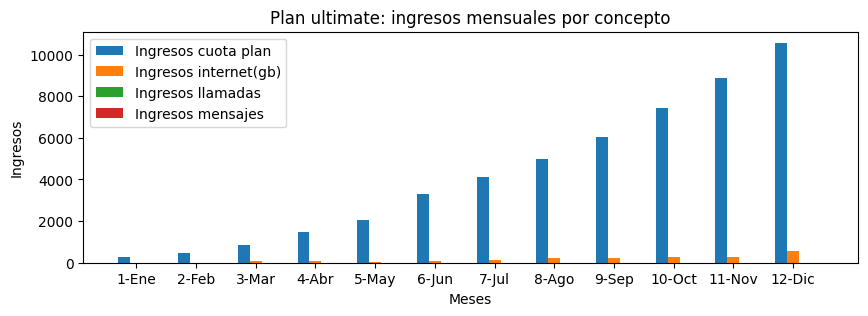



La suma mensual de ingresos por cada concepto del plan ultimate es:

        usd_monthly_pay  ingreso_gb  ingreso_llamadas  ingreso_messages  \
month                                                                    
1                  280         0.0               0.0               0.0   
2                  490         0.0               0.0               0.0   
3                  840        70.0               0.0               0.0   
4                 1470        77.0               0.0               0.0   
5                 2030        28.0               0.0               0.0   
6                 3290        84.0               0.0               0.0   
7                 4130       126.0               0.0               0.0   
8                 4970       245.0               0.0               0.0   
9                 6020       203.0               0.0               0.0   
10                7420       280.0               0.0               0.0   
11                8890       252.0      

In [277]:
# Gráfico ingresos totales por concepto por plan

# Datos filtrados

ingresos_internet_mensual_ultimate = min_ultimate.groupby('month')['ingreso_gb'].sum()

ingresos_messages_mensual_ultimate = min_ultimate.groupby('month')['ingreso_messages'].sum()

ingresos_llamadas_mensual_ultimate = min_ultimate.groupby('month')['ingreso_llamadas'].sum()

ingresos_cuota_plan_mensual_ultimate = min_ultimate.groupby('month')['usd_monthly_pay'].sum()

plt.figure(figsize=(10,3))

width2 = 0.2  # Ancho de cada barra

# Gráfico de barras multiples

plt.bar(x - width2, ingresos_cuota_plan_mensual_ultimate, width=width2, label='Ingresos cuota plan')
plt.bar(x, ingresos_internet_mensual_ultimate, width=width2, label='Ingresos internet(gb)')
plt.bar(x + width2, ingresos_llamadas_mensual_ultimate, width=width2, label='Ingresos llamadas')
plt.bar(x + 2*width2, ingresos_messages_mensual_ultimate, width=width2, label='Ingresos mensajes')


plt.xlabel('Meses')
plt.ylabel('Ingresos')
plt.title('Plan ultimate: ingresos mensuales por concepto')
plt.legend()
plt.xticks(x, meses)

plt.show()

print()

# Tabla ingresos totales mensuales por concepto

ingresos_concepto_ultimate = round(min_ultimate.groupby('month')[['usd_monthly_pay','ingreso_gb','ingreso_llamadas','ingreso_messages','ingresos_totales']].sum())

print()
print('La suma mensual de ingresos por cada concepto del plan ultimate es:\n\n', ingresos_concepto_ultimate)

Histograma con curva de densidades ingresos plan surf:



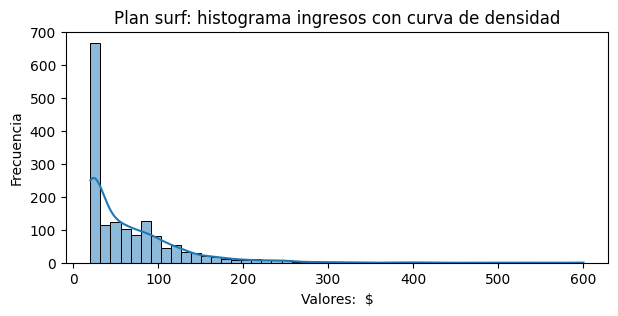

In [278]:
# Histograma ingresos totales

print('Histograma con curva de densidades ingresos plan surf:')
print()

plt.figure(figsize=(7,3))

sns.histplot(min_surf['ingresos_totales'], kde=True, line_kws={'color':'red'})  # histograma con curva de densidades

plt.title('Plan surf: histograma ingresos con curva de densidad')
plt.xlabel('Valores:  $')
plt.ylabel('Frecuencia')

plt.show()

Histograma con curva de densidades ingresos plan ultimate:



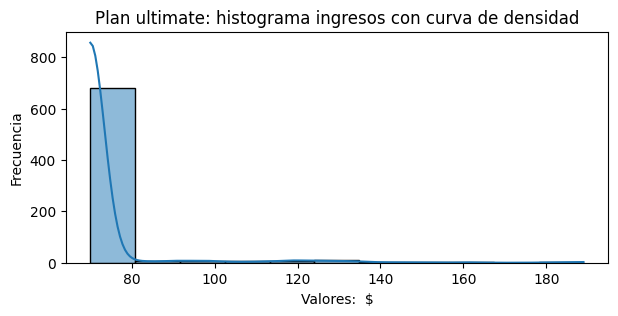

In [279]:
# Histograma ingresos totales

print('Histograma con curva de densidades ingresos plan ultimate:')
print()

plt.figure(figsize=(7,3))

sns.histplot(min_ultimate['ingresos_totales'], kde=True, line_kws={'color':'red'})  # histograma con curva de densidades

plt.title('Plan ultimate: histograma ingresos con curva de densidad')
plt.xlabel('Valores:  $')
plt.ylabel('Frecuencia')

plt.show()

In [280]:
# Calcula la media y la varianza de los ingresos de los planes:

# Plan surf:

mean_ingreso_surf = min_surf['ingresos_totales'].mean()   # media

median_ingreso_surf = min_surf['ingresos_totales'].median() # mediana

var_ingreso_surf = np.var(min_surf['ingresos_totales'])  # varianza

dev_std_ingreso_surf= np.sqrt(var_ingreso_surf)  # desviación estándar

# Plan ultimate:

mean_ingreso_ultimate = min_ultimate['ingresos_totales'].mean()  # media

median_ingreso_ultimate = min_ultimate['ingresos_totales'].median() # mediana

var_ingreso_ultimate = np.var(min_ultimate['ingresos_totales'])  # varianza

dev_std_ingreso_utimate = np.sqrt(var_ingreso_ultimate)  # desviación estándar

print('Estadísticos ingresos plan "surf":')
print()
print('Media:', mean_ingreso_surf)
print()
print('Mediana:', median_ingreso_surf)
print()
print('Varianza:', var_ingreso_surf)
print()
print('Desviavión estándar:', dev_std_ingreso_surf)
print()

print('Estadísticos ingesos plan "ultimate":')
print()
print('Media:', mean_ingreso_ultimate)
print()
print('Mediana:', median_ingreso_ultimate)
print()
print('Varianza:', var_ingreso_ultimate)
print()
print('Desviavión estádar:', dev_std_ingreso_utimate)

Estadísticos ingresos plan "surf":

Media: 63.6116846789574

Mediana: 43.81

Varianza: 3293.502590741005

Desviavión estándar: 57.38904591244748

Estadísticos ingesos plan "ultimate":

Media: 72.70277777777778

Mediana: 70.0

Varianza: 160.38388117283952

Desviavión estádar: 12.664275785564666


Estadisticas rápidas ingresos plan "surf":

 count    1573.000000
mean       63.611685
std        57.407297
min        20.000000
25%        20.000000
50%        43.810000
75%        90.000000
max       600.370000
Name: ingresos_totales, dtype: float64

Diagrama de caja ingresos del plan "surf":



Text(0.5, 1.0, 'Plan surf: gráfico de caja ingresos')

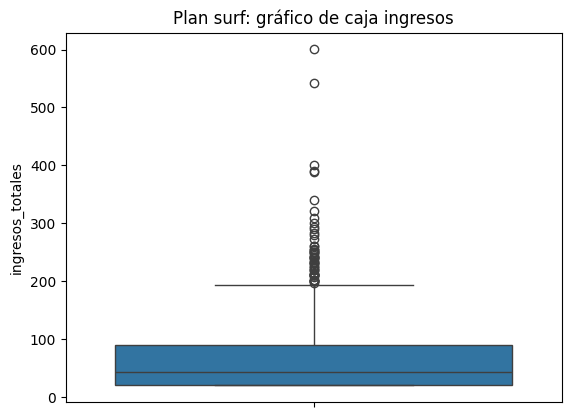

In [281]:
# Traza un diagrama de caja para visualizar la distribución de los ingresos

print('Estadisticas rápidas ingresos plan "surf":\n\n', min_surf['ingresos_totales'].describe())
print()

print('Diagrama de caja ingresos del plan "surf":')
print()

sns.boxplot(min_surf['ingresos_totales'])

plt.title('Plan surf: gráfico de caja ingresos')

Estadisticas rápidas ingresos plan "ultimate":

 count    720.000000
mean      72.702778
std       12.673080
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      189.000000
Name: ingresos_totales, dtype: float64

Diagrama de caja ingresos del plan "ultimate":



Text(0.5, 1.0, 'Plan ultimate: gráfico de caja ingresos')

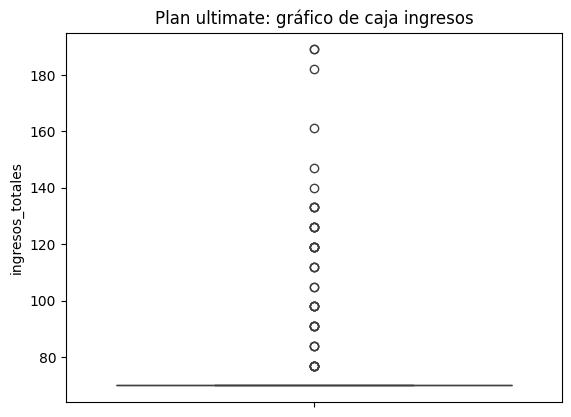

In [282]:
# Traza un diagrama de caja para visualizar la distribución de los ingresos

print('Estadisticas rápidas ingresos plan "ultimate":\n\n', min_ultimate['ingresos_totales'].describe())
print()

print('Diagrama de caja ingresos del plan "ultimate":')
print()

sns.boxplot(min_ultimate['ingresos_totales'])

plt.title('Plan ultimate: gráfico de caja ingresos')

In [283]:
# Calculo de ingresos totales e ingresos por plan

print('Correlación ingresos totales y los ingresos del plan "surf":', usuarios_consumos_tarifa['ingresos_totales'].corr(min_surf['ingresos_totales']))
print()
print('Correlación ingresos totales y los ingresos del plan "ultimate":', usuarios_consumos_tarifa['ingresos_totales'].corr(min_ultimate['ingresos_totales']))

Correlación ingresos totales y los ingresos del plan "surf": 1.0

Correlación ingresos totales y los ingresos del plan "ultimate": 1.0


**Comportamiento: Ingresos**

En cuanto a los ingresos promedio por usuario mensual encontramos que los pertenecientes al plan “surf” presentan mayor variación mensual con un constante incremente mes a mes hasta llegar a igualar a los que registran los del plan “ultimate” en el mes de diciembre. Por su parte el grupo del plan “ultimate” se mantienen estables mes a mes, excepto por los meses de marzo y abril que tienen un ligero pico superior a la media.

Cabe mencionar que los usuarios únicos por mes se incrementan consistentemente.

El ingreso mensual tiene mayor aportación por parte de los usuarios del plan “surf”, quienes adicional de tener mas registro de usuarios, su aportación al ingreso medio mensual es ligeramente inferior al del plan “ultimate”, esto debido a los pagos adicionales que realizan por exceder su consumo de internet principalmente.

Al realizar una revisión de los ingresos por concepto mes a mes encontramos que después del pago mensual de la cuota del plan, el pago por consumo de internet (gb) es el concepto que aporta más ingresos, es decir, por lo regular los usuario exceden su cuota de internet incluida en el plan, esencialmente los usuarios del plan “surf” y realizan pagos extras por este concepto, dejando relegados los ingresos extras por minutos de llamadas y envío de mensajes, que aún con ingreso, es un porcentaje muy bajo de los ingresos mensuales.
Revisando a detalle la aportación de ingresos por cada plan encontramos:

* El plan surf es genera una aportación importante de ingresos por concepto de consumo de internet (gb) superando hasta el ingreso por la cuota del plan. Este concepto es el de mayor importancia para el ingreso total de este plan.

* En el plan “ultimate” su mayor aportación se basa en el pago de las cuotas mensuales del plan, ya que los ingresos por otros conceptos son mucho menores a los aportados por el plan “surf”. Como lo vimos en los análisis anteriores por concepto, por lo regular los usuarios del plan “ultimate” no rebasan los limites incluidos en las cuotas del plan.

El histograma de ingresos del plan “surf” se encuentra sesgado a la derecha, con un rango amplio de desviación estándar, inducido principalmente por los pagos de consumos de internet.
El histograma de ingresos del plan “ultimate” es prácticamente plano, ya que prácticamente todos los valores están apegados a la media y mediana.

Valores estadísticos:

Plan surf:

* Media: 63.61
* Mediana: 43.81
* Varianza: 3,293
* Desviación estándar: 57.39

El gráfico de caja de este plan nos indica:

* Existen bastantes valores atípicos fuera del límite superior, con el máximo valor en 600.
* Primer cuartil en el valor: 20
* Segundo cuartil (mediana): 43.81
* Tercer cuartil en el valor: 90
* IQR: 70

Plan ultimate:

* Media: 72.70
* Mediana: 70
* Varianza: 160.38
* Desviación estándar: 12.66

El gráfico de caja de este plan nos indica:

* Existen bastantes valores atípicos fuera del límite superior, con el máximo valor en 189.
* Primer cuartil en el valor: 70
* Segundo cuartil (mediana): 70
* Tercer cuartil en el valor: 70
* IQR: 0

Se realizó el calculo del coeficiente de correlación entre los ingresos de cada plan y los ingresos totales:

* Correlación ingresos totales y los ingresos del plan "surf": 0.9999999999999999

* Correlación ingresos totales y los ingresos del plan "ultimate": 1.0

En ambos prácticamente existe una correlación perfecta.


## **Prueba las hipótesis estadísticas**

#### **Prueba de hipótesis 1**

* **Hipótesis nula = "Los ingresos promedio procedentes de los usuarios de los planes de llamada ultimate y surf es igual”**

* **Hipótesis alternativa = "Los ingresos promedio procedentes de los usuarios de los planes de llamada ultimate y surf son significativamente diferentes”**

In [284]:
# calculo de ingreso medio por llamadas y varianza

mean_ingreso_llamadas_surf = min_surf['ingreso_llamadas'].mean()
mean_ingreso_llamadas_ultimate = min_ultimate['ingreso_llamadas'].mean()

var_ingreso_llamadas_surf = np.var(min_surf['ingreso_llamadas'])
var_ingreso_llamadas_ultimate = np.var(min_ultimate['ingreso_llamadas'])

print('Media ingreso por llamadas plan surf:', mean_ingreso_llamadas_surf)
print('Media ingreso por llamadas plan ultimate:', mean_ingreso_llamadas_ultimate)
print('Varianza ingreso por llamadas plan surf:', var_ingreso_llamadas_surf)
print('Varianza ingreso por llamadas plan ultimate:', var_ingreso_llamadas_ultimate)



Media ingreso por llamadas plan surf: 1.8437698664971391
Media ingreso por llamadas plan ultimate: 0.0
Varianza ingreso por llamadas plan surf: 14.17181573089108
Varianza ingreso por llamadas plan ultimate: 0.0


In [308]:
# Prueba de Levene para comparación de varianzas

print('Prueba de Levene para comparación de varianzas:')

alpha= 0.05

# Realizar la prueba
stat, p = st.levene(min_surf['ingreso_llamadas'], min_ultimate['ingreso_llamadas'])

# Imprimir los resultados
print('Estadístico de prueba:', stat)
print('Valor p:', p)

# Si el valor p es menor que un nivel de significancia predefinido (por ejemplo, 0.05), se rechaza la hipótesis nula y se concluye que las varianzas son significativamente diferentes.

if p < alpha:
    print('Las varianzas son significativamente diferentes')
else:
    print('Las varianzas NO son significativamente diferentes')

Prueba de Levene para comparación de varianzas:
Estadístico de prueba: 172.56052754033155
Valor p: 4.674805149461084e-38
Las varianzas son significativamente diferentes


In [286]:
# Prueba las hipótesis

alpha= 0.05    # nivel de significación estadistica estándar

resultado_test = st.ttest_ind(min_surf['ingreso_llamadas'],min_ultimate['ingreso_llamadas'], equal_var=False)  #  Las varianzas son diferentes

print('valor p:', resultado_test.pvalue)

# Si el "valor p" es menor a "alpha" rechazaremos la hipótesis

if resultado_test.pvalue < alpha:
    print('Rechazamos la hipótesis nula: "Los ingresos promedio procedentes de los usuarios de los planes de llamada ultimate y surf es igual”')
else:
    print('No podemos rechazar la hipótesis nula: "Los ingresos promedio procedentes de los usuarios de los planes de llamada ultimate y surf es igual”')  

valor p: 1.8353463617698226e-75
Rechazamos la hipótesis nula: "Los ingresos promedio procedentes de los usuarios de los planes de llamada ultimate y surf es igual”


#### **Prueba de hipótesis 2**

* **Hipótesis nula = “El ingreso promedio de los usuarios del área de NY-NJ es igual al de otras regiones”**

* **Hipótesis alternativa = “El ingreso promedio de los usuarios del área de NY-NJ es diferente al de otras regiones”**

In [287]:
# filtro por regiones


print('Zonas de ususarios:\n\n',usuarios_consumos_tarifa['city'].unique())

# Zona de interes: 'New York-Newark-Jersey City, NY-NJ-PA MSA'

# Filtro de datos

zona_NY_NJ = usuarios_consumos_tarifa[usuarios_consumos_tarifa['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']

print()
print('Zona de interes:\n\n',zona_NY_NJ['city'].unique())

zonas_comparacion = usuarios_consumos_tarifa[usuarios_consumos_tarifa['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']

print()
print('Zona de comparacion:\n\n',zonas_comparacion['city'].unique())

Zonas de ususarios:

 ['Atlanta-Sandy Springs-Roswell, GA MSA' 'Seattle-Tacoma-Bellevue, WA MSA'
 'Las Vegas-Henderson-Paradise, NV MSA' 'Tulsa, OK MSA'
 'Dallas-Fort Worth-Arlington, TX MSA'
 'San Francisco-Oakland-Berkeley, CA MSA' 'Grand Rapids-Kentwood, MI MSA'
 'Orlando-Kissimmee-Sanford, FL MSA'
 'San Jose-Sunnyvale-Santa Clara, CA MSA' 'Cleveland-Elyria, OH MSA'
 'Chicago-Naperville-Elgin, IL-IN-WI MSA' 'Knoxville, TN MSA'
 'New York-Newark-Jersey City, NY-NJ-PA MSA' 'Pittsburgh, PA MSA'
 'Fresno, CA MSA' 'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA'
 'Indianapolis-Carmel-Anderson, IN MSA' 'Jacksonville, FL MSA'
 'Los Angeles-Long Beach-Anaheim, CA MSA'
 'Omaha-Council Bluffs, NE-IA MSA'
 'Houston-The Woodlands-Sugar Land, TX MSA'
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA'
 'Tampa-St. Petersburg-Clearwater, FL MSA' 'Birmingham-Hoover, AL MSA'
 'Oklahoma City, OK MSA' 'Charlotte-Concord-Gastonia, NC-SC MSA'
 'Denver-Aurora-Lakewood, CO MSA'
 'Nashville-Davidson–Murfr

In [288]:
# calculo de ingresos medio por zonas

mean_ingreso_zona_NY_NJ = zona_NY_NJ['ingresos_totales'].mean()
mean_ingreso_zonas_comparacion = zonas_comparacion['ingresos_totales'].mean()

var_ingreso_zona_NY_NJ = np.var(zona_NY_NJ['ingresos_totales'])
var_ingreso_zonas_comparacion = np.var(zonas_comparacion['ingresos_totales'])

print('Media ingreso zona NY-NJ:', mean_ingreso_zona_NY_NJ)
print('Media ingreso zonas comparación:', mean_ingreso_zonas_comparacion)
print('Varianza ingreso zona NY-NJ:', var_ingreso_zona_NY_NJ)
print('Varianza ingreso zonas comparación:', var_ingreso_zonas_comparacion)

Media ingreso zona NY-NJ: 62.72506631299734
Media ingreso zonas comparación: 67.20241649269312
Varianza ingreso zona NY-NJ: 2045.2947332184146
Varianza ingreso zonas comparación: 2379.742365089582


In [309]:
# Prueba de Levene para comparación de varianzas

print('Prueba de Levene para comparación de varianzas:')

alpha= 0.05

# Realizar la prueba
stat, p = st.levene(zona_NY_NJ['ingresos_totales'], zonas_comparacion['ingresos_totales'])

# Imprimir los resultados
print('Estadístico de prueba:', stat)
print('Valor p:', p)

# Si el valor p es menor que un nivel de significancia predefinido (por ejemplo, 0.05), se rechaza la hipótesis nula y se concluye que las varianzas son significativamente diferentes.

if p < alpha:
    print('Las varianzas son significativamente diferentes')
else:
    print('Las varianzas NO son significativamente diferentes')

Prueba de Levene para comparación de varianzas:
Estadístico de prueba: 2.9245049137322225
Valor p: 0.08737938066626735
Las varianzas NO son significativamente diferentes


In [290]:
# Prueba las hipótesis

alpha= 0.05    # nivel de significación estadistica estándar

resultado_test_2 = st.ttest_ind(zona_NY_NJ['ingresos_totales'],zonas_comparacion['ingresos_totales'], equal_var=True)  # Las varianzas son diferentes

print('valor p:', resultado_test_2.pvalue)

# Si el "valor p" es menor a "alpha" rechazaremos la hipótesis

if resultado_test_2.pvalue < alpha:
    print('Rechazamos la hipótesis nula: “El ingreso promedio de los usuarios del área de NY-NJ es igual al de otras regiones”')
else:
    print('No podemos rechazar la hipótesis nula: “El ingreso promedio de los usuarios del área de NY-NJ es igual al de otras regiones”')  

valor p: 0.09960492321602975
No podemos rechazar la hipótesis nula: “El ingreso promedio de los usuarios del área de NY-NJ es igual al de otras regiones”


## **Conclusiones y recomendaciones****

**Proyecto:** Eficiencia de tarifas telecomunicaciones Megaline.

**Objetivo:** Identificar las tarifas con mejor rendimiento de ingresos para la compañía.

**Resultados:**

* **La tarifa con mejor rendimiento para la compañía es el plan “surf”**, con un costo inicial de 20 usd genera ingresos promedio de 63.61 usd mensuales, triplicando el ingreso inicial.
* Los ingresos adicionales se generan especialmente por el cobro de consumo de internet (gb) adicional a lo otorgado en el plan base.
* El consumidor puede percibir un plan de más bajo costo inicial, con opción a mayor consumo de internet con un costo adicional.
* Los usuarios del plan “ultimate”, mantienen el ingreso promedio en 72.7 usd mensuales, prácticamente solo 2 usd extras por mes, muy apegado a su costo estándar.
* En el plan “ultimate” en raras ocasiones se generan ingresos extra por consumos adicionales.
* En ambos planes, los ingresos adicionales por consumo extra de minutos de llamadas y/o mensajes, es muy bajo, no representan un impacto representativo en los ingresos.

**Procesamiento de la información:**

* Se recibieron y analizaron las bases de datos del proyecto, entendiendo el contenido de cada uno de estos.
* Se revisaron y corrigieron formatos, valores duplicados y valores ausentes.
* Se enriqueció cada dataset con información importante para los posteriores análisis.
* Se integro un dataset general conteniendo toda la información del proyecto.

**Análisis de la información:**

* Se utilizaron gráficas de barras, líneas, histogramas, de caja para la visualización y comprensión de la información por cada concepto, aplicando los filtros necesarios para cada caso.
* Se aplicaron estudios estadísticos: media, mediana, varianza, desviación estándar, curvas de densidad, coeficiente de correlación para cada concepto de análisis.
* Se realizaron pruebas de hipótesis para las preguntas planteadas.

Se elaboraron comentarios en cada etapa y paso del proceso realizado en el presente proyecto, identificando las áreas de oportunidad y aplicando acciones de mejora en cada una de estas.
